In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn import metrics
import shap
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/mordred2.csv')
y = pd.DataFrame(data['Yield'],columns=['Yield'])
X = data.drop(columns=['Yield', 'Ligand_name', 'Ligand_smiles', 'Substrate_name'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, shuffle=False)
print(y_train.head())
print(X_train.head())

   Yield
0   20.0
1    9.0
2    7.0
3   18.0
4   34.0
   L_nAcid  L_nBase  L_nAromAtom  L_nAromBond  L_nAtom  L_nHeavyAtom  \
0      0.0      0.0         24.0         24.0     49.0          27.0   
1      0.0      0.0         24.0         24.0     49.0          27.0   
2      0.0      0.0         24.0         24.0     49.0          27.0   
3      0.0      0.0         24.0         24.0     49.0          27.0   
4      0.0      0.0         24.0         24.0     49.0          27.0   

   L_nBridgehead  L_nHetero  L_nH  L_nC  ...   S_SRW10   S_TSRW10        S_MW  \
0            0.0        2.0  22.0  25.0  ...  9.282754  45.217583  182.073165   
1            0.0        2.0  22.0  25.0  ...  9.508591  48.143524  210.104465   
2            0.0        2.0  22.0  25.0  ...  9.599608  50.610520  242.094294   
3            0.0        2.0  22.0  25.0  ...  9.508591  48.143524  218.054321   
4            0.0        2.0  22.0  25.0  ...  8.590258  37.289972  120.057515   

      S_AMW  S_WPath  S_WP

In [3]:
param = {"max_leaf_nodes": [3, 5, 7, 15], "max_depth": [4, 6, 8], "l2_regularization": [0, 0.1, 1]}
reg = GridSearchCV(HistGradientBoostingRegressor(random_state=0, max_bins=51, min_samples_leaf=5),
                   param_grid=param, cv=5, n_jobs=16)
reg.fit(X_train,y_train['Yield'])
best = reg.best_estimator_
print(reg.best_params_)
y_pred = best.predict(X_train)

print(metrics.r2_score(y_train, y_pred))

{'l2_regularization': 1, 'max_depth': 4, 'max_leaf_nodes': 15}
0.9895856239926114


Text(0, 0.5, 'prediction')

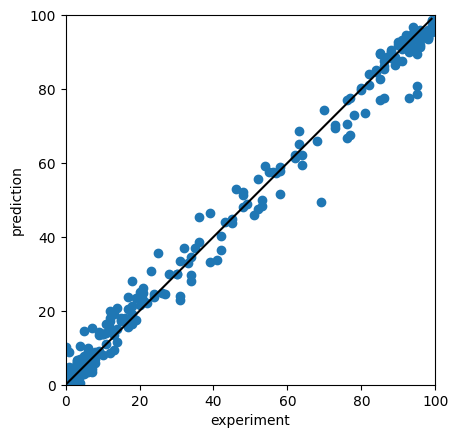

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(0,100),range(0,100), c = "black")
plt.scatter(y_train, y_pred)
plt.xlim(0,100)
plt.ylim(0,100)
ax.set_aspect('equal', adjustable='box')
plt.xlabel("experiment")
plt.ylabel("prediction")

In [5]:
explainer = shap.TreeExplainer(best)
shap_values1 = explainer(X_train)
shap_values2 = explainer(X_test)

In [6]:
y_pred_test = best.predict(X_test)
print('1st (L34) :', y_pred_test[3])
print('2nd (L91) :', y_pred_test[60])
print('3rd (L53) :', y_pred_test[22])
print('4th (L86) :', y_pred_test[55])
print('5th (L38) :', y_pred_test[7])

1st (L34) : 30.182552533167403
2nd (L91) : 27.613631414493177
3rd (L53) : 26.475602593088013
4th (L86) : 26.223623804897404
5th (L38) : 25.24222546660025


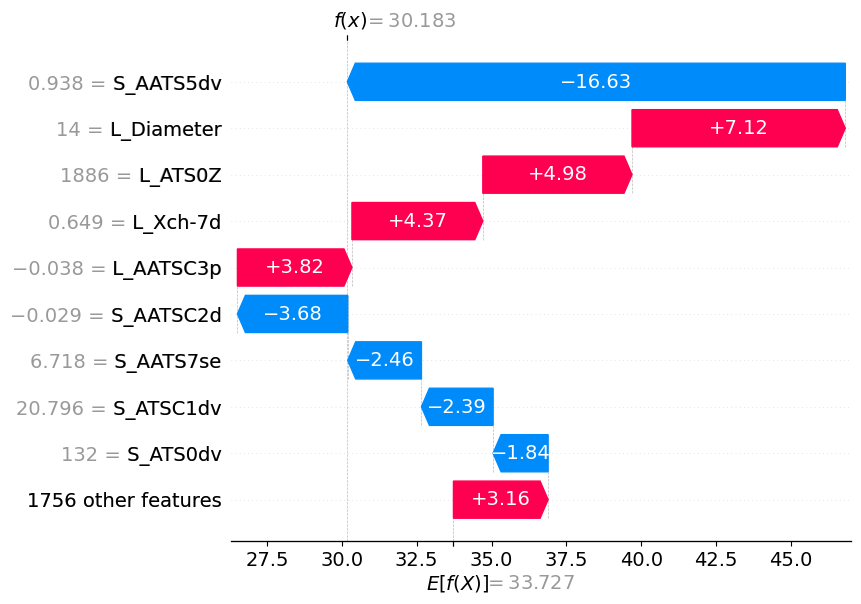

In [7]:
# L34
entry = 3
fig = plt.figure()
shap.plots.waterfall(shap_values2[entry], show=False, max_display=10)
for text_obj in fig.findobj(match=plt.Text):
    text_obj.set_fontsize(14)
plt.show()
fig.savefig('result/SHAP/prediction/waterfall_L34.pdf')

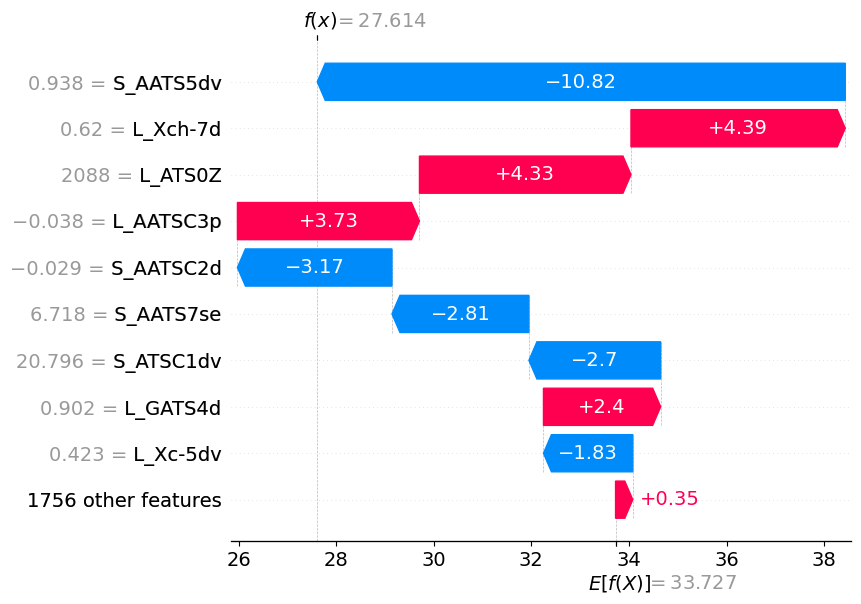

In [8]:
# L91
entry = 60
fig = plt.figure()
shap.plots.waterfall(shap_values2[entry], show=False, max_display=10)
for text_obj in fig.findobj(match=plt.Text):
    text_obj.set_fontsize(14)
plt.show()
fig.savefig('result/SHAP/prediction/waterfall_L91.pdf')

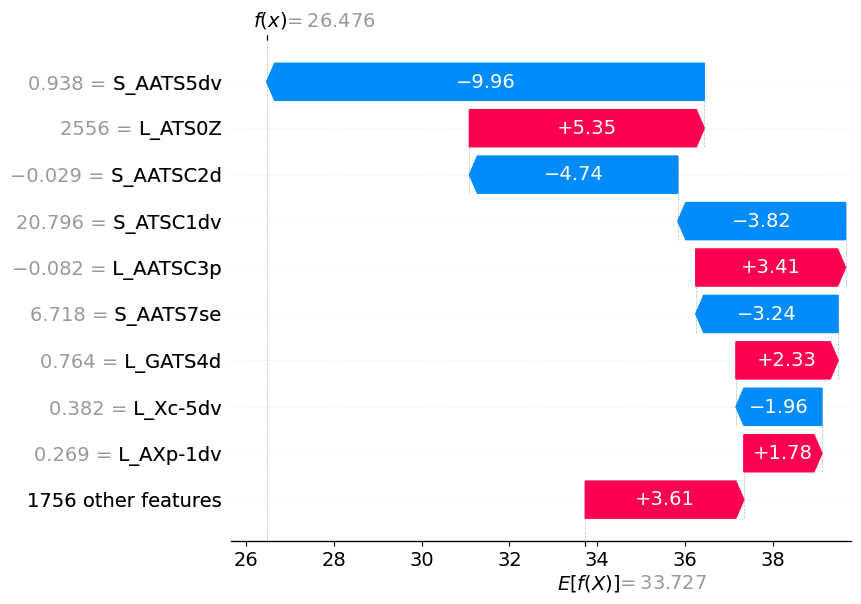

In [9]:
# L53
entry = 22
fig = plt.figure()
shap.plots.waterfall(shap_values2[entry], show=False, max_display=10)
for text_obj in fig.findobj(match=plt.Text):
    text_obj.set_fontsize(14)
plt.show()
fig.savefig('result/SHAP/prediction/waterfall_L53.pdf')

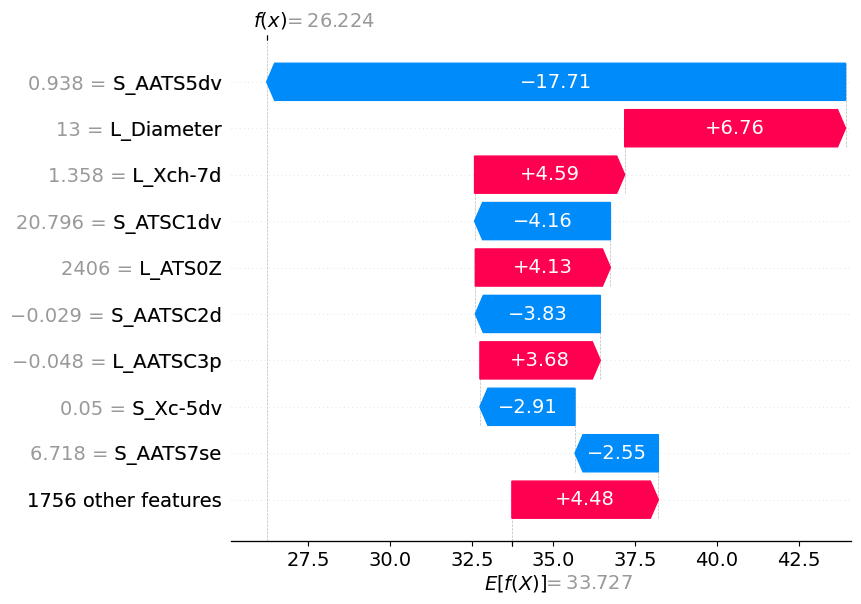

In [10]:
# L86
entry = 55
fig = plt.figure()
shap.plots.waterfall(shap_values2[entry], show=False, max_display=10)
for text_obj in fig.findobj(match=plt.Text):
    text_obj.set_fontsize(14)
plt.show()
fig.savefig('result/SHAP/prediction/waterfall_L86.pdf')

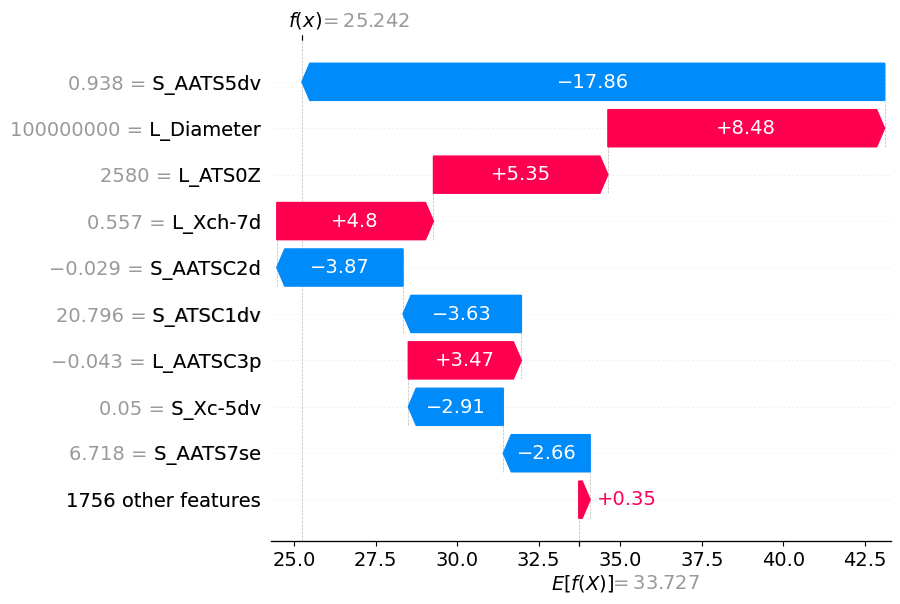

In [11]:
# L38
entry = 7
fig = plt.figure()
shap.plots.waterfall(shap_values2[entry], show=False, max_display=10)
for text_obj in fig.findobj(match=plt.Text):
    text_obj.set_fontsize(14)
plt.show()
fig.savefig('result/SHAP/prediction/waterfall_L38.pdf')

In [12]:
data_train, data_test = train_test_split(data, train_size=300, shuffle=False)
data_at = data_train.query('Substrate_name == "alpha-tetralone"')
data_L6 = data_at.query('Ligand_name == "L6"')
data_L6

Ligand_name                                      Ligand_smiles  L_nAcid  \
57          L6  C1(C2=C(P(C3=CC=CC=C3)C4=CC=CC=C4)C=CC=C2)=C(P...      0.0   

    L_nBase  L_nAromAtom  L_nAromBond  L_nAtom  L_nHeavyAtom  L_nBridgehead  \
57      0.0         36.0         36.0     66.0          38.0            0.0   

    L_nHetero  ...   S_TSRW10        S_MW     S_AMW  S_WPath  S_WPol  \
57        2.0  ...  41.607772  146.073165  6.955865    140.0    15.0   

    S_Zagreb1  S_Zagreb2  S_mZagreb1  S_mZagreb2  Yield  
57       56.0       65.0    3.083333    2.472222   13.0  

[1 rows x 1769 columns]

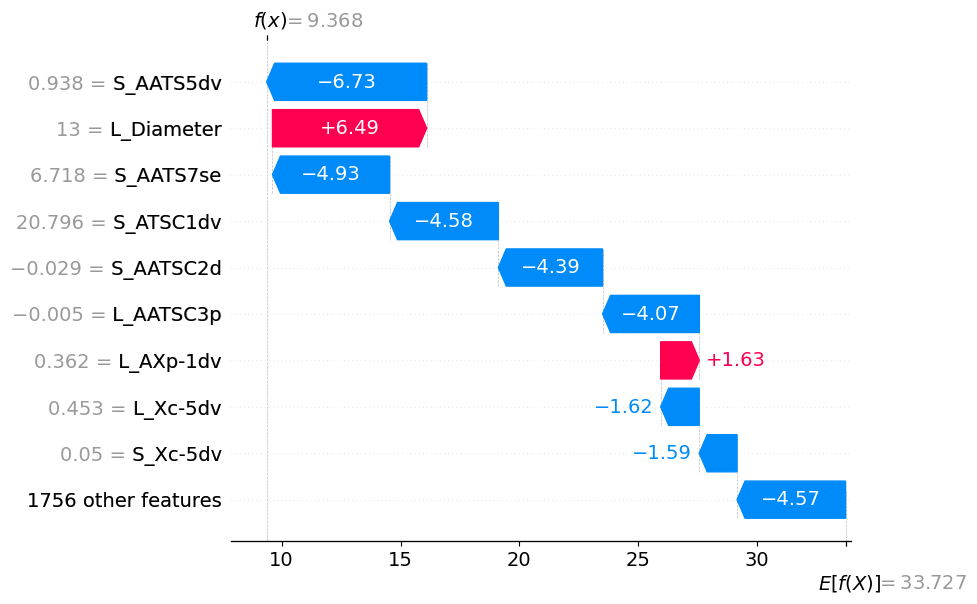

In [13]:
entry = 57
fig = plt.figure()
shap.plots.waterfall(shap_values1[entry], show=False, max_display=10)
for text_obj in fig.findobj(match=plt.Text):
    text_obj.set_fontsize(14)
plt.show()
fig.savefig('result/SHAP/training/waterfall_L6.pdf')

In [14]:
data_L8 = data_at.query('Ligand_name == "L8"')
data_L8

Ligand_name                                      Ligand_smiles  L_nAcid  \
77          L8  C1(OC2=CC=CC=C2P(C3=CC=CC=C3)C4=CC=CC=C4)=C(P(...      0.0   

    L_nBase  L_nAromAtom  L_nAromBond  L_nAtom  L_nHeavyAtom  L_nBridgehead  \
77      0.0         36.0         36.0     67.0          39.0            0.0   

    L_nHetero  ...   S_TSRW10        S_MW     S_AMW  S_WPath  S_WPol  \
77        3.0  ...  41.607772  146.073165  6.955865    140.0    15.0   

    S_Zagreb1  S_Zagreb2  S_mZagreb1  S_mZagreb2  Yield  
77       56.0       65.0    3.083333    2.472222   39.0  

[1 rows x 1769 columns]

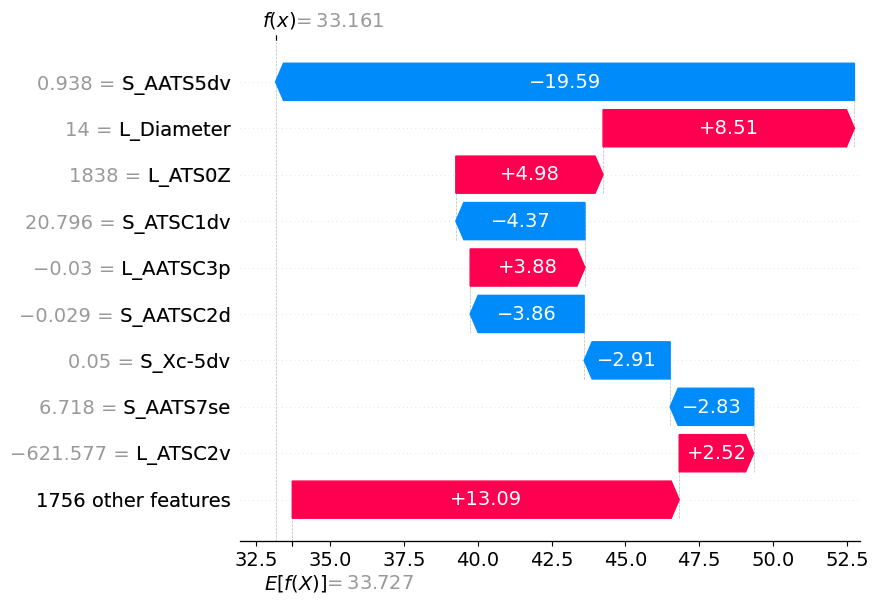

In [15]:
entry = 77
fig = plt.figure()
shap.plots.waterfall(shap_values1[entry], show=False, max_display=10)
for text_obj in fig.findobj(match=plt.Text):
    text_obj.set_fontsize(14)
plt.show()
fig.savefig('result/SHAP/training/waterfall_L8.pdf')

In [16]:
data_L9 = data_at.query('Ligand_name == "L9"')
data_L9

Ligand_name                                      Ligand_smiles  L_nAcid  \
87          L9  CC1(C)C2=CC=CC(P(C3=CC=CC=C3)C4=CC=CC=C4)=C2OC...      0.0   

    L_nBase  L_nAromAtom  L_nAromBond  L_nAtom  L_nHeavyAtom  L_nBridgehead  \
87      0.0         36.0         36.0     74.0          42.0            0.0   

    L_nHetero  ...   S_TSRW10        S_MW     S_AMW  S_WPath  S_WPol  \
87        3.0  ...  41.607772  146.073165  6.955865    140.0    15.0   

    S_Zagreb1  S_Zagreb2  S_mZagreb1  S_mZagreb2  Yield  
87       56.0       65.0    3.083333    2.472222   19.0  

[1 rows x 1769 columns]

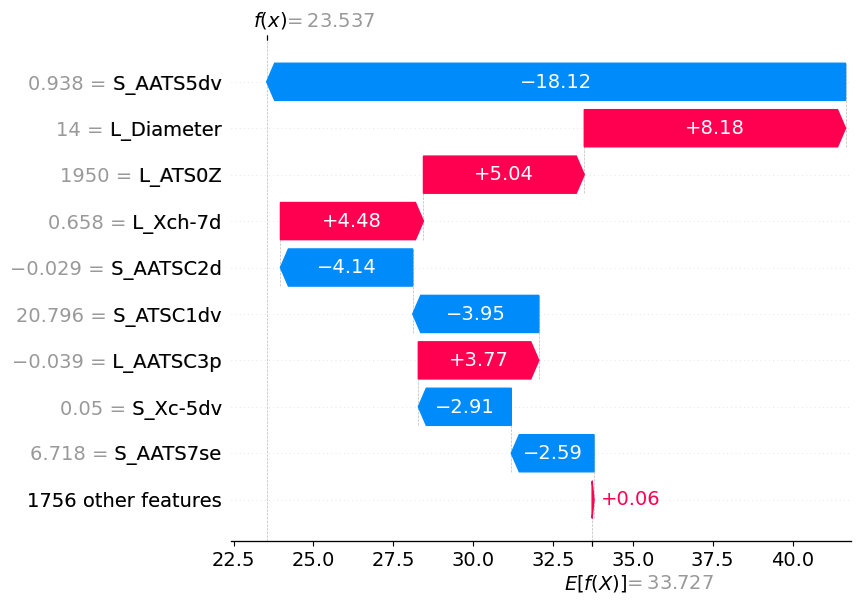

In [17]:
entry = 87
fig = plt.figure()
shap.plots.waterfall(shap_values1[entry], show=False, max_display=10)
for text_obj in fig.findobj(match=plt.Text):
    text_obj.set_fontsize(14)
plt.show()
fig.savefig('result/SHAP/training/waterfall_L9.pdf')

In [18]:
data_L11 = data_at.query('Ligand_name == "L11"')
data_L11

Ligand_name                                      Ligand_smiles  L_nAcid  \
107         L11  C1=CC=C(C=C1)P([C-]2C=CC=C2)C3=CC=CC=C3.C1=CC=...      2.0   

     L_nBase  L_nAromAtom  L_nAromBond  L_nAtom  L_nHeavyAtom  L_nBridgehead  \
107      0.0         34.0         34.0     65.0          37.0            0.0   

     L_nHetero  ...   S_TSRW10        S_MW     S_AMW  S_WPath  S_WPol  \
107        3.0  ...  41.607772  146.073165  6.955865    140.0    15.0   

     S_Zagreb1  S_Zagreb2  S_mZagreb1  S_mZagreb2  Yield  
107       56.0       65.0    3.083333    2.472222   15.0  

[1 rows x 1769 columns]

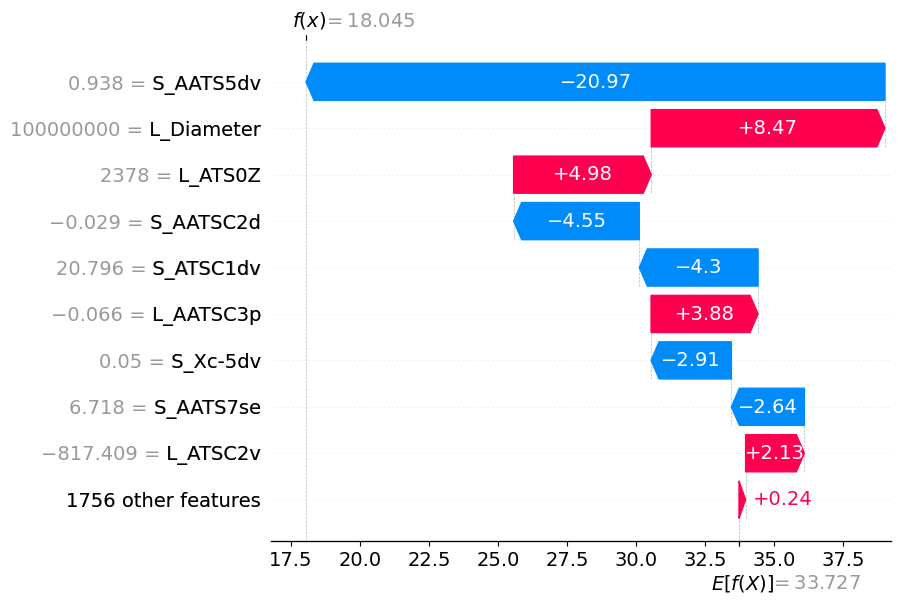

In [19]:
entry = 107
fig = plt.figure()
shap.plots.waterfall(shap_values1[entry], show=False, max_display=10)
for text_obj in fig.findobj(match=plt.Text):
    text_obj.set_fontsize(14)
plt.show()
fig.savefig('result/SHAP/training/waterfall_L11.pdf')

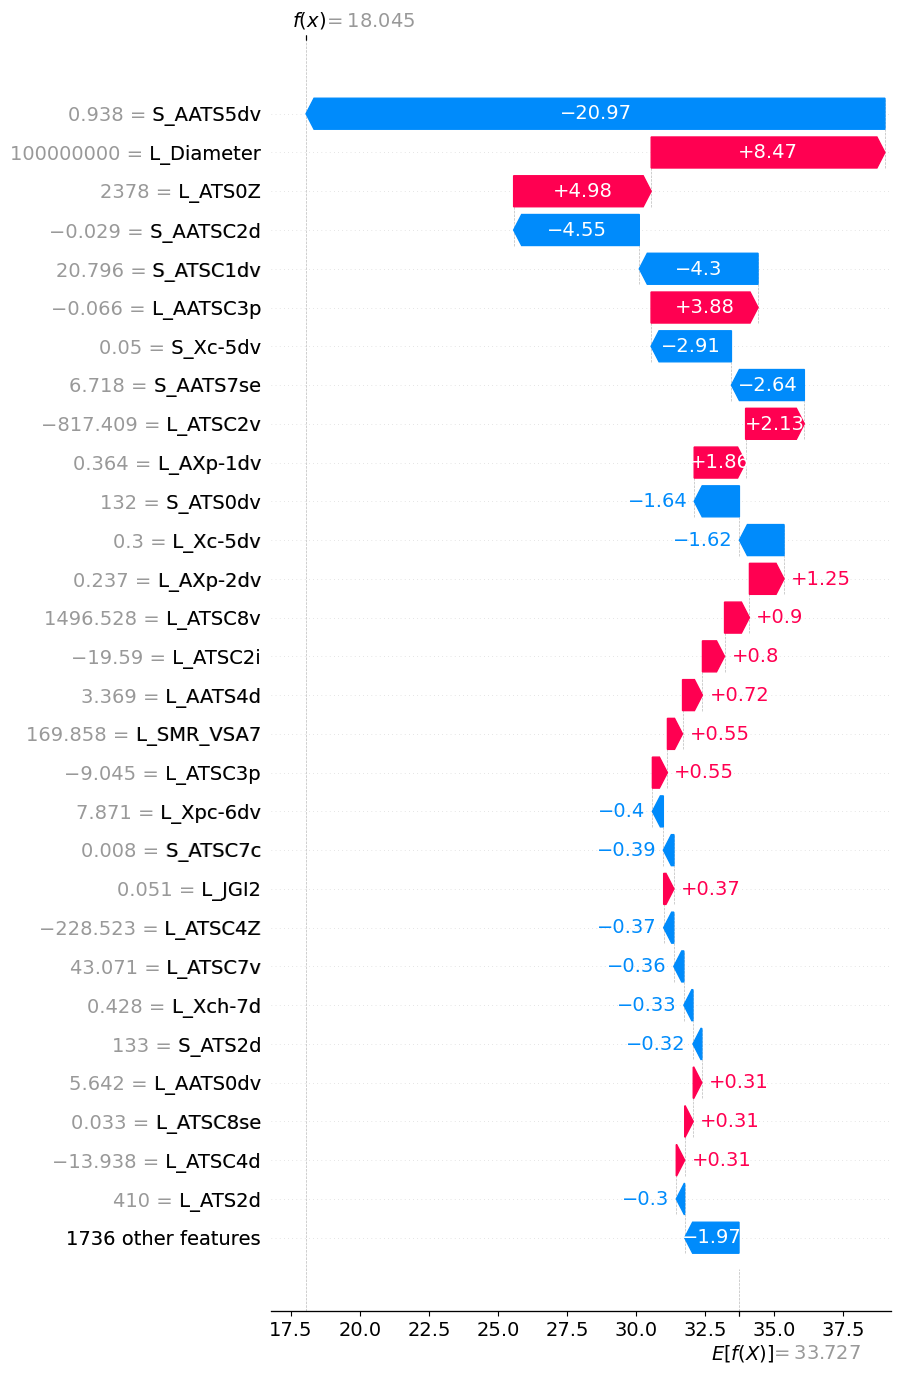

In [20]:
entry = 107
fig = plt.figure()
shap.plots.waterfall(shap_values1[entry], show=False, max_display=30)
for text_obj in fig.findobj(match=plt.Text):
    text_obj.set_fontsize(14)
plt.show()
fig.savefig('result/SHAP/training/waterfall_L11_30.pdf')

In [21]:
data_L16 = data_at.query('Ligand_name == "L16"')
data_L16

Ligand_name                                      Ligand_smiles  L_nAcid  \
157         L16  CC1=CC(C)=CC(P(C2=CC(C)=CC(C)=C2)C3=CC(C)=CC(C...      0.0   

     L_nBase  L_nAromAtom  L_nAromBond  L_nAtom  L_nHeavyAtom  L_nBridgehead  \
157      0.0         18.0         18.0     52.0          25.0            0.0   

     L_nHetero  ...   S_TSRW10        S_MW     S_AMW  S_WPath  S_WPol  \
157        1.0  ...  41.607772  146.073165  6.955865    140.0    15.0   

     S_Zagreb1  S_Zagreb2  S_mZagreb1  S_mZagreb2  Yield  
157       56.0       65.0    3.083333    2.472222   42.0  

[1 rows x 1769 columns]

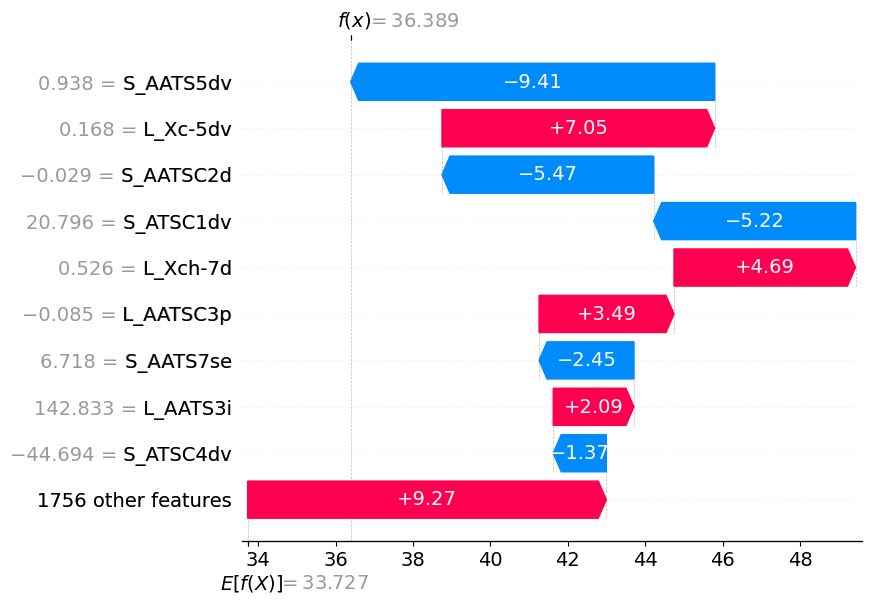

In [22]:
entry = 157
fig = plt.figure()
shap.plots.waterfall(shap_values1[entry], show=False, max_display=10)
for text_obj in fig.findobj(match=plt.Text):
    text_obj.set_fontsize(14)
plt.show()
fig.savefig('result/SHAP/training/waterfall_L16.pdf')

L1


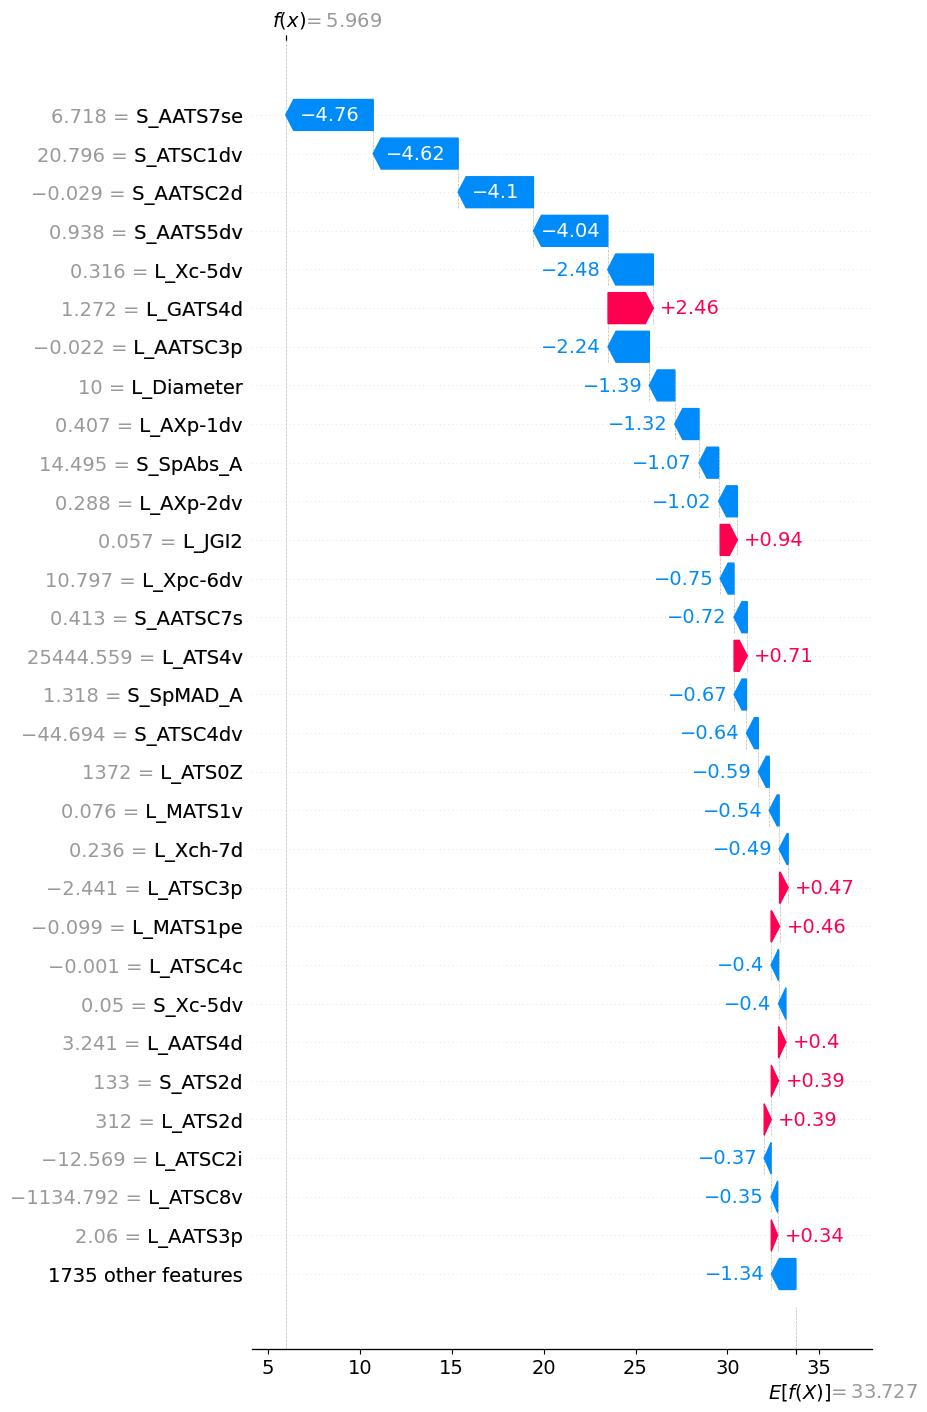

L2


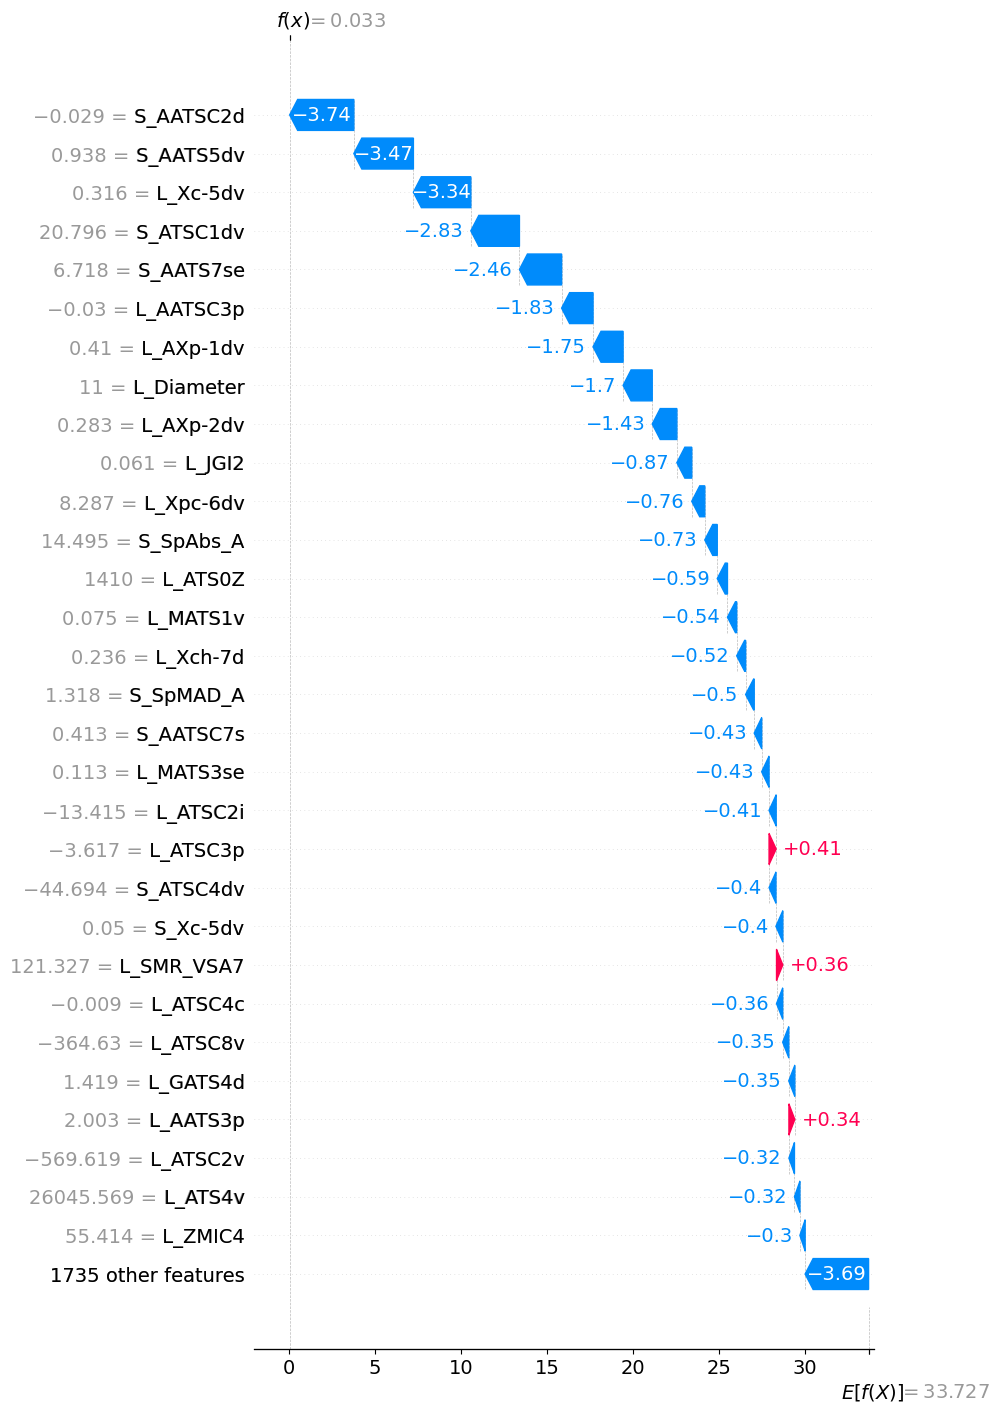

L3


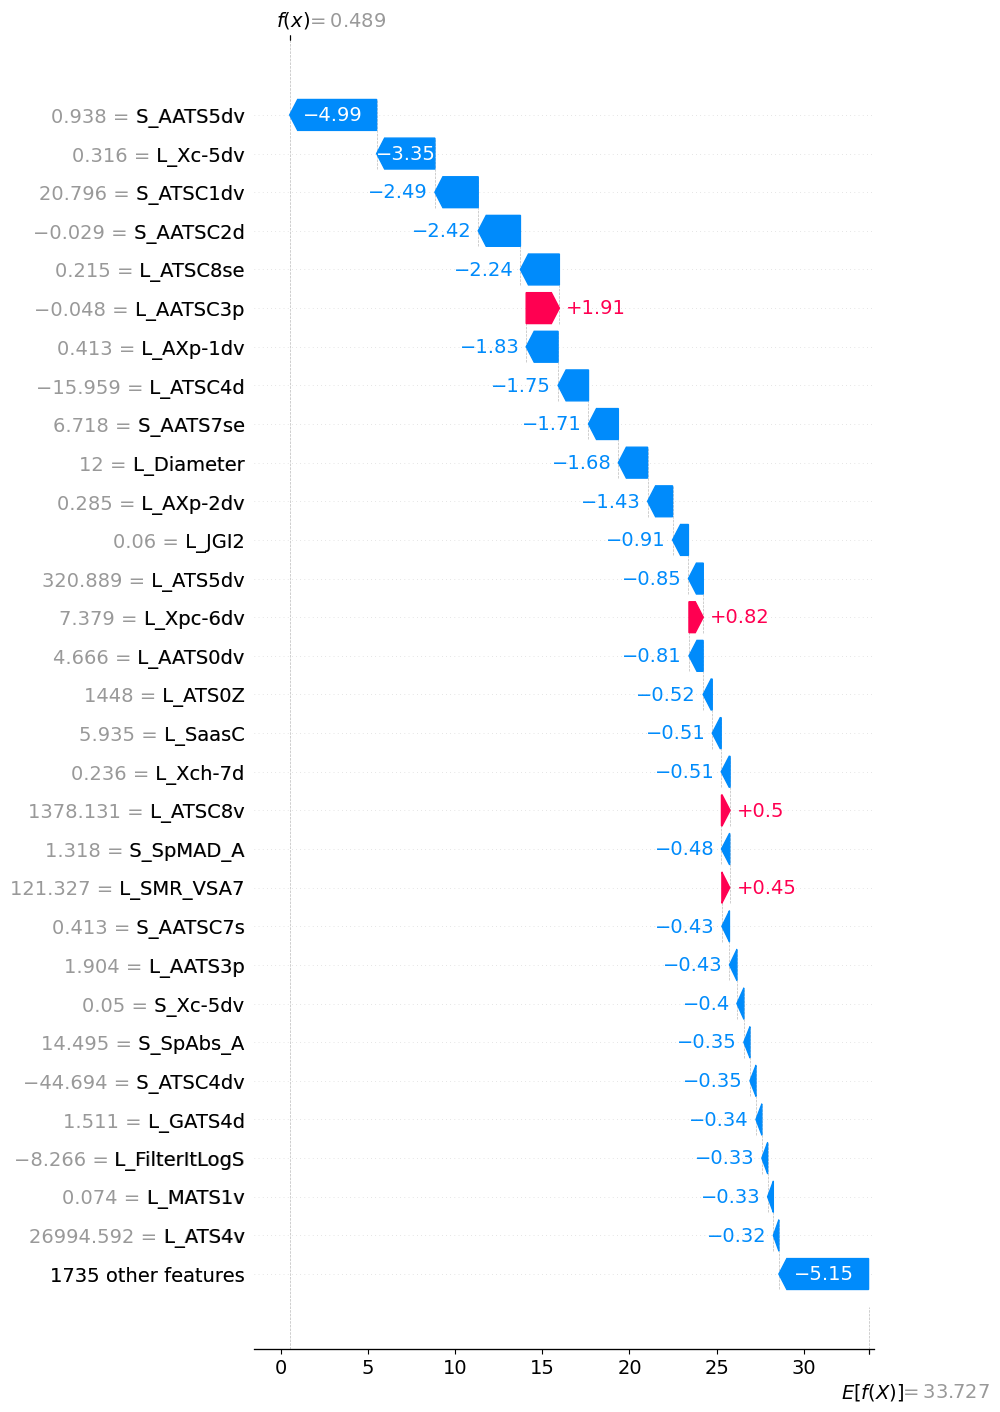

L4


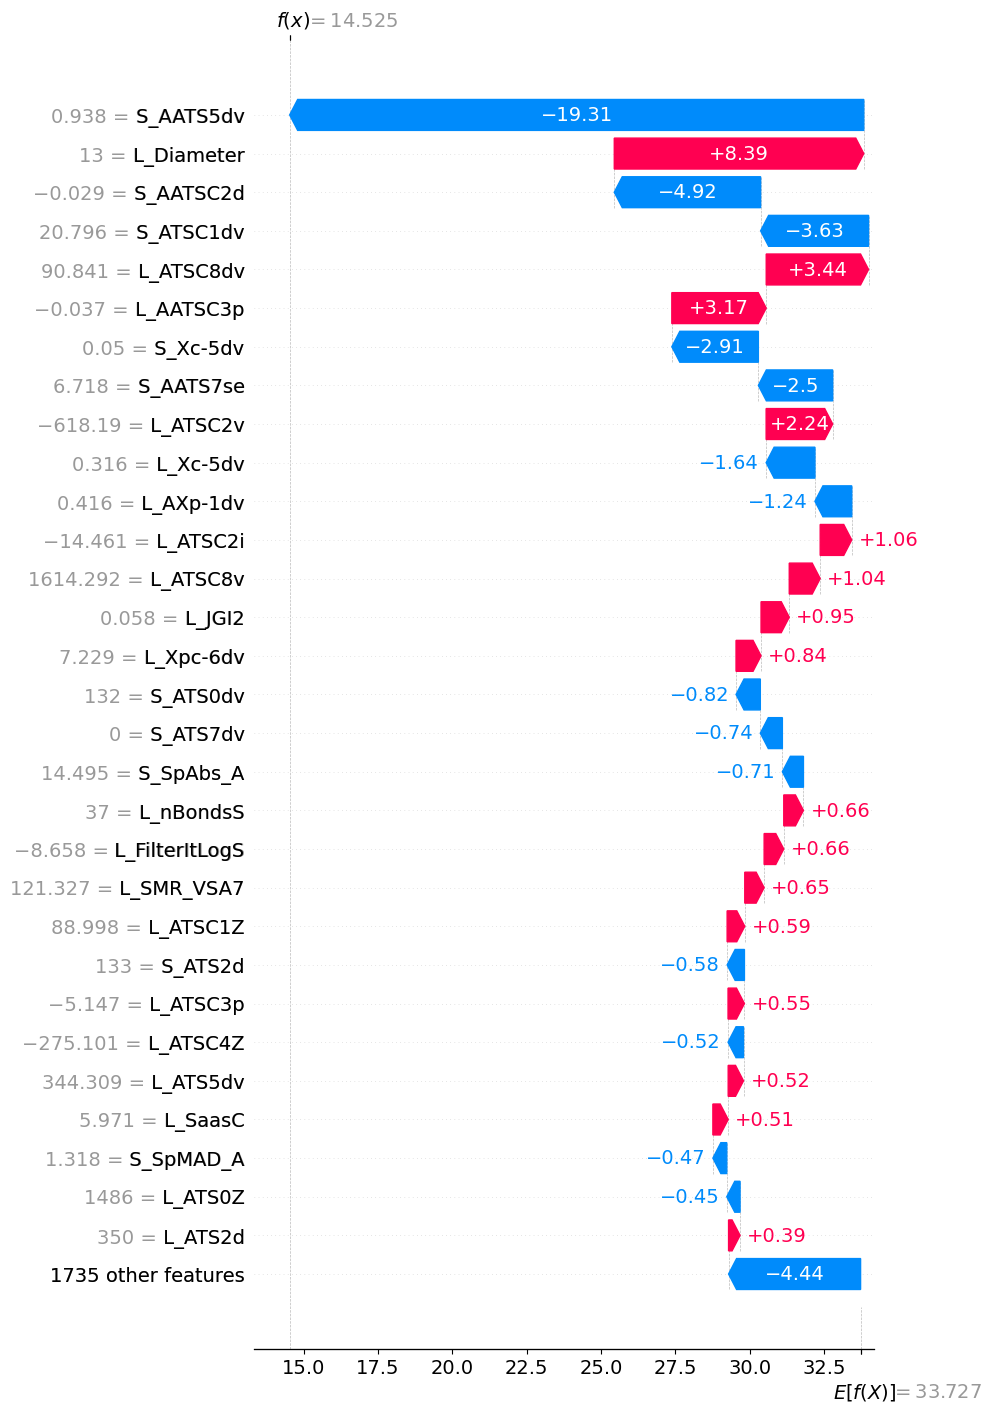

L5


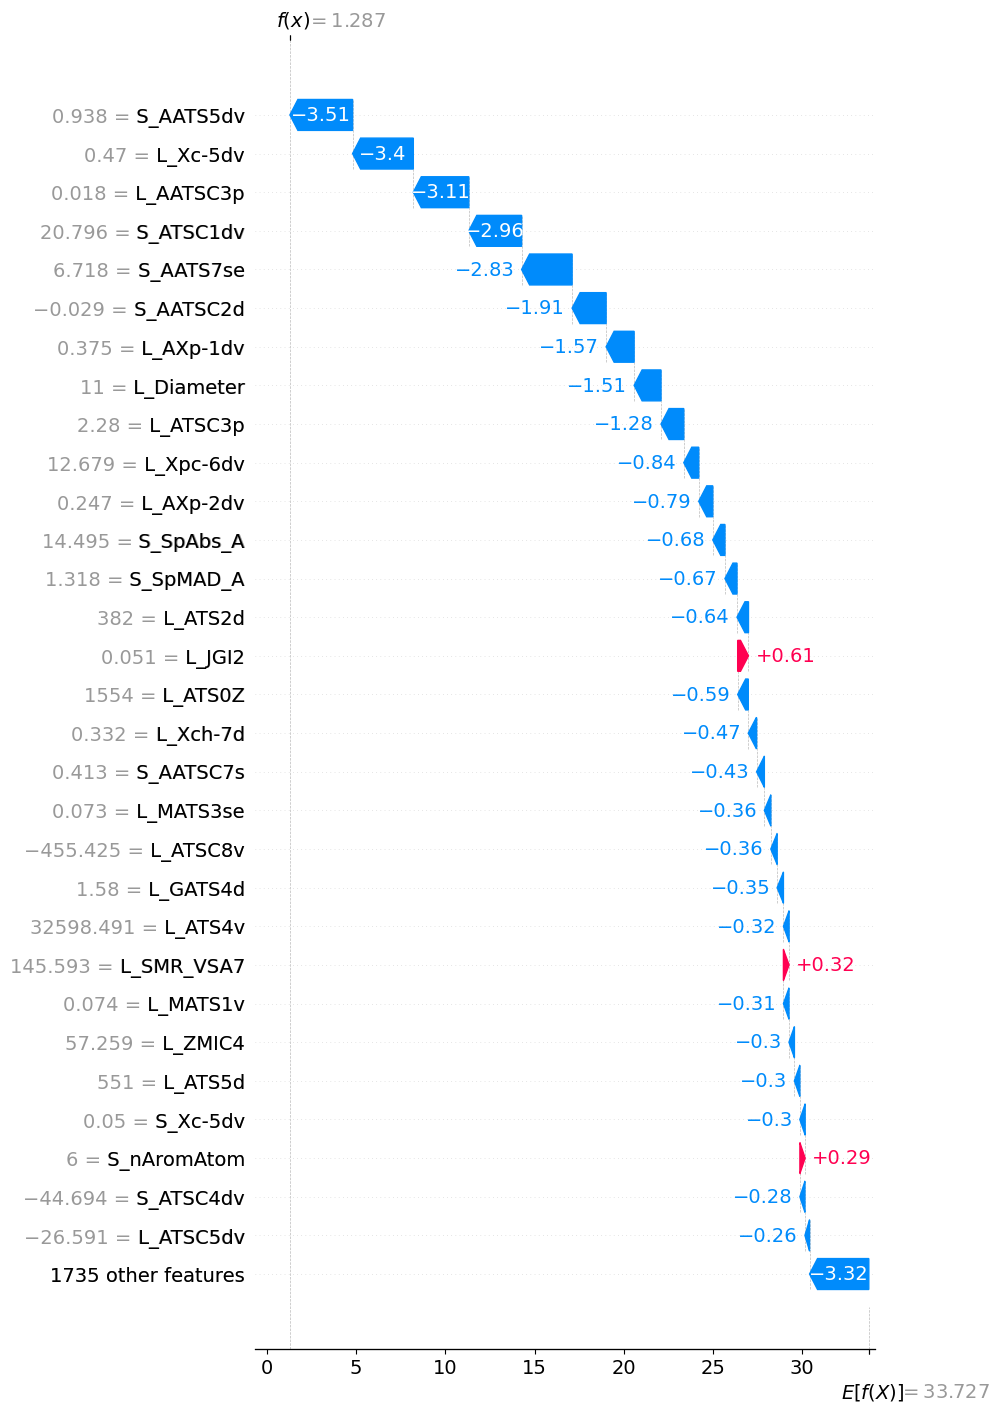

L6


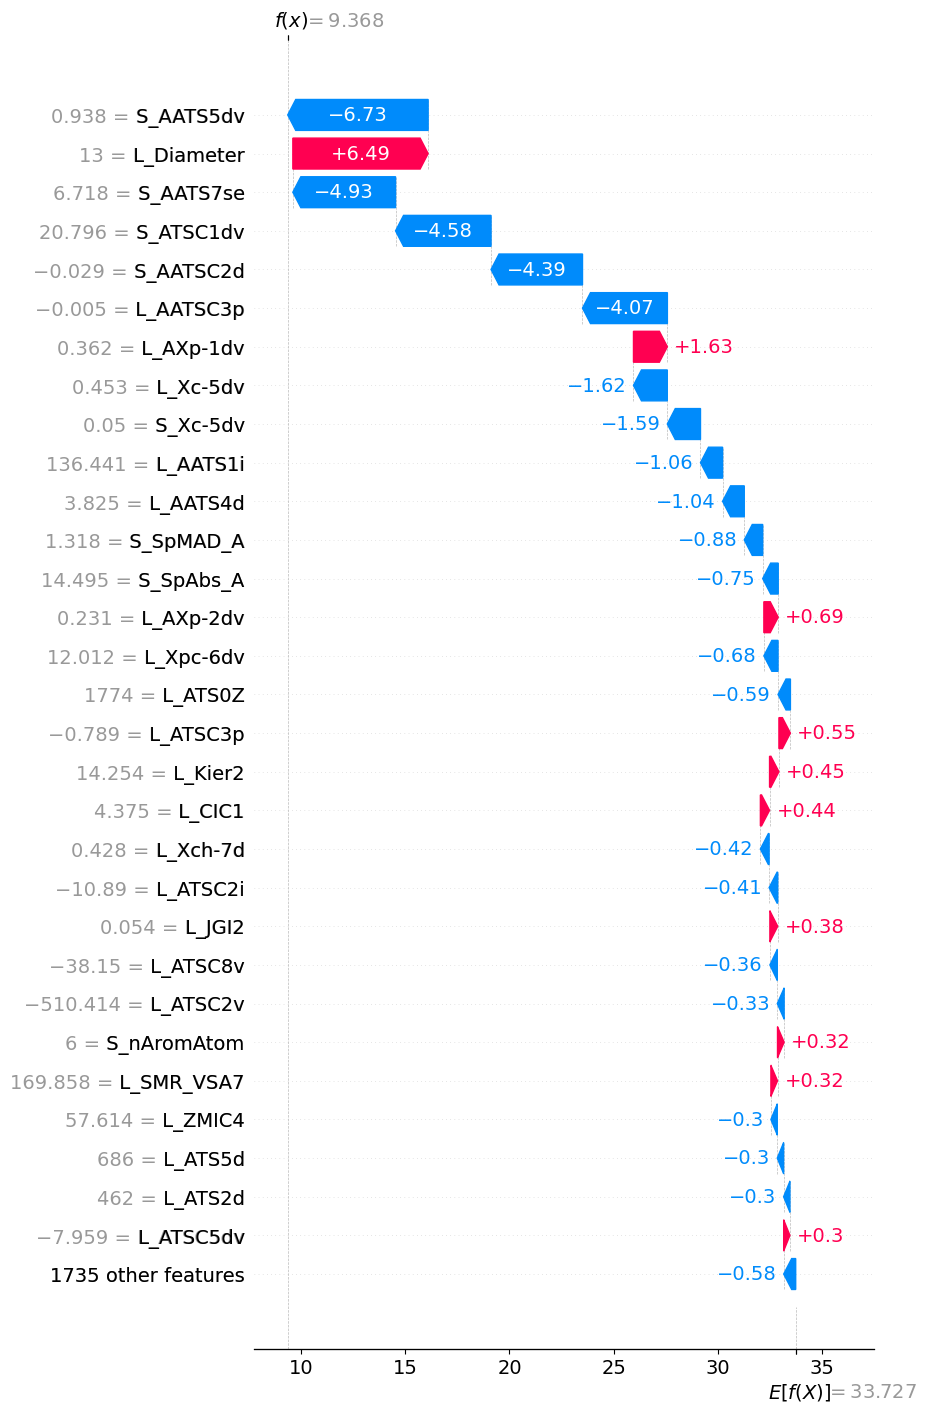

L7


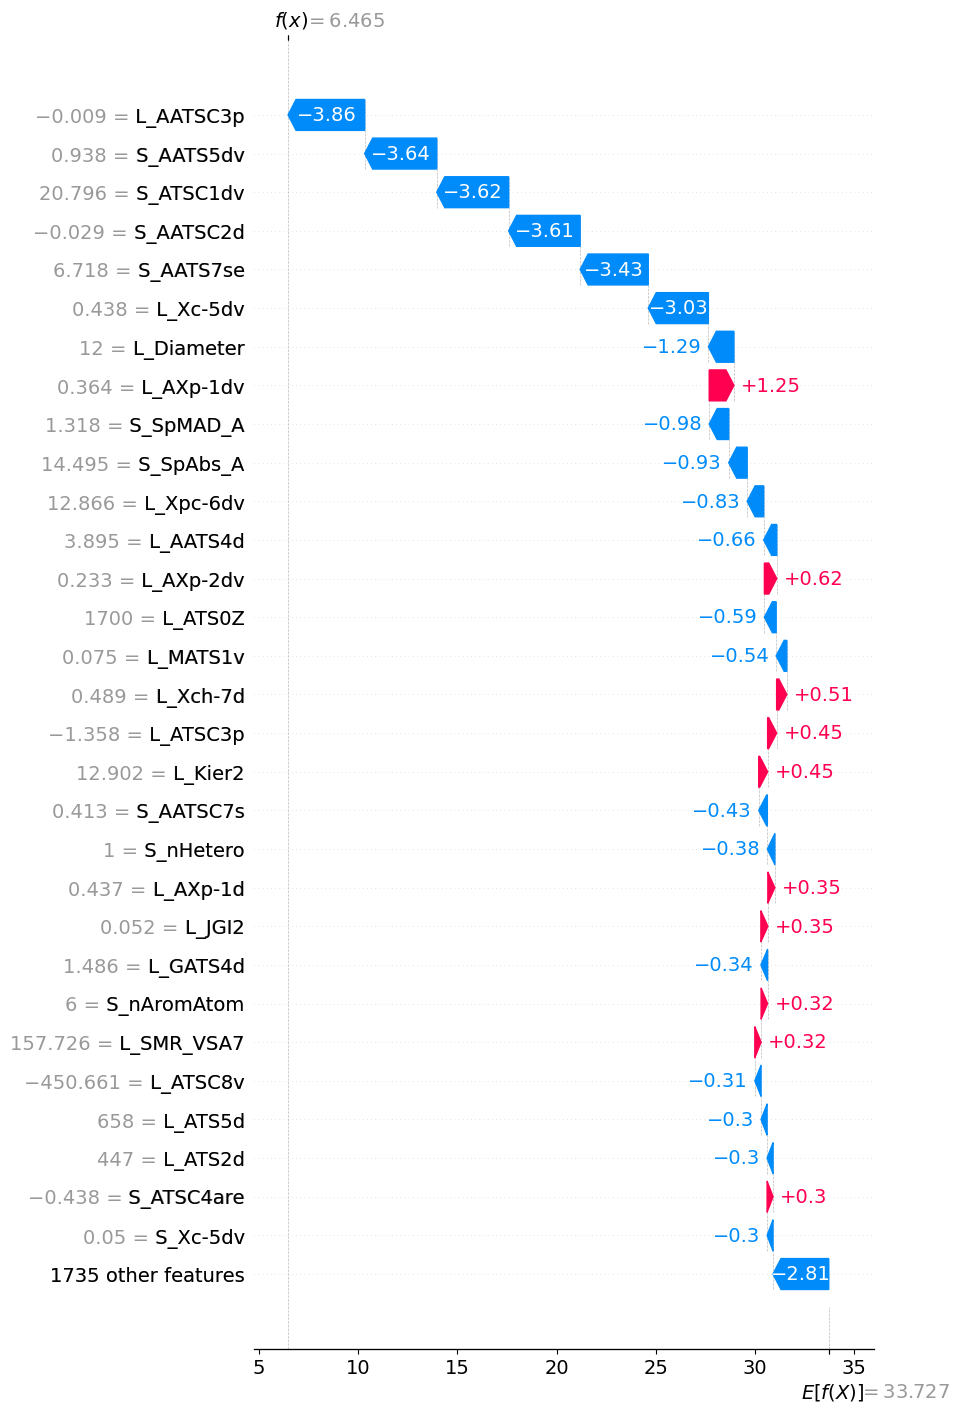

L8


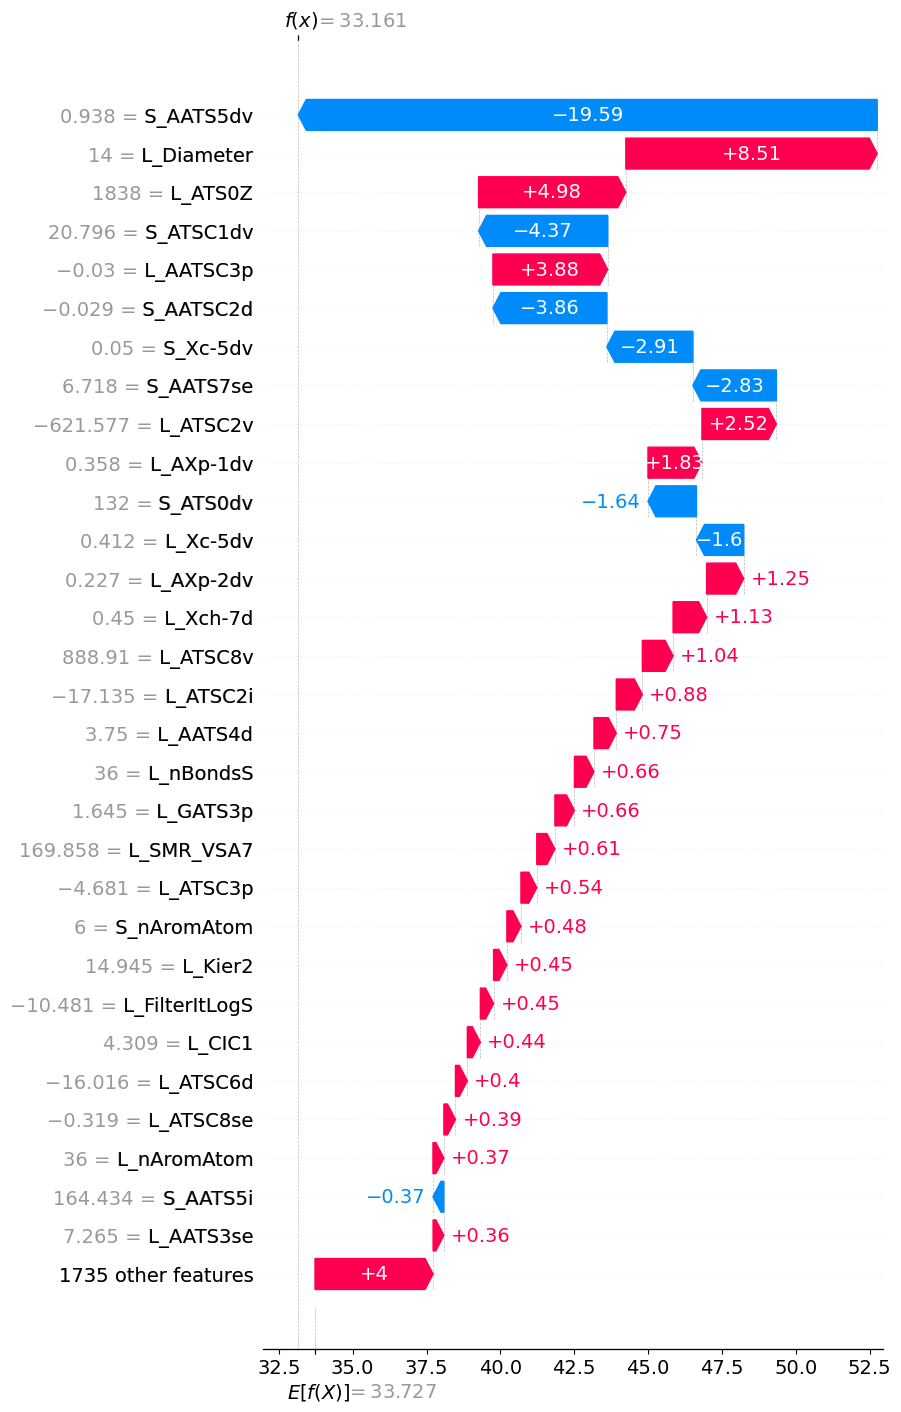

L9


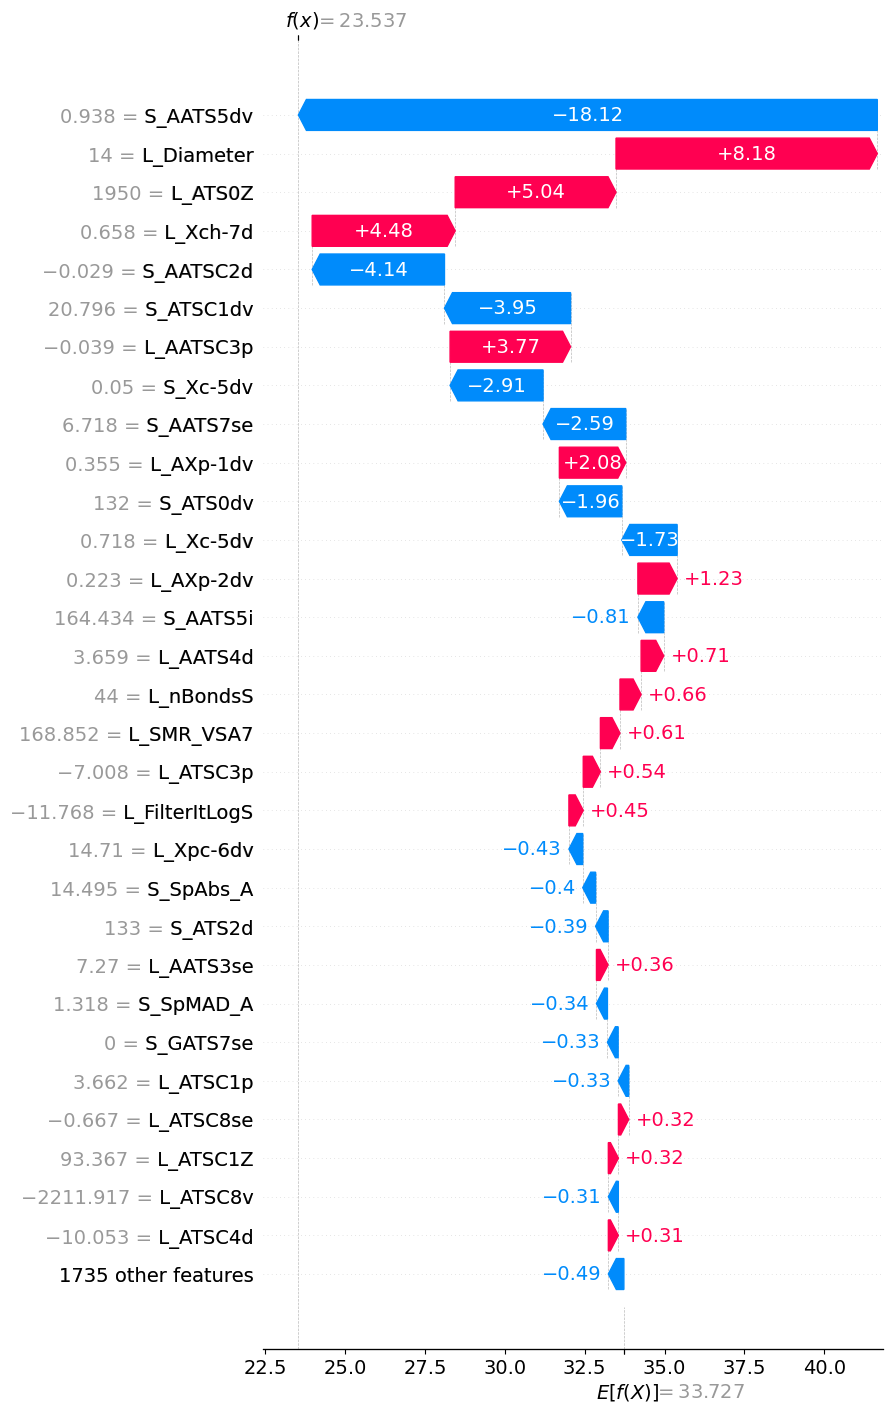

L10


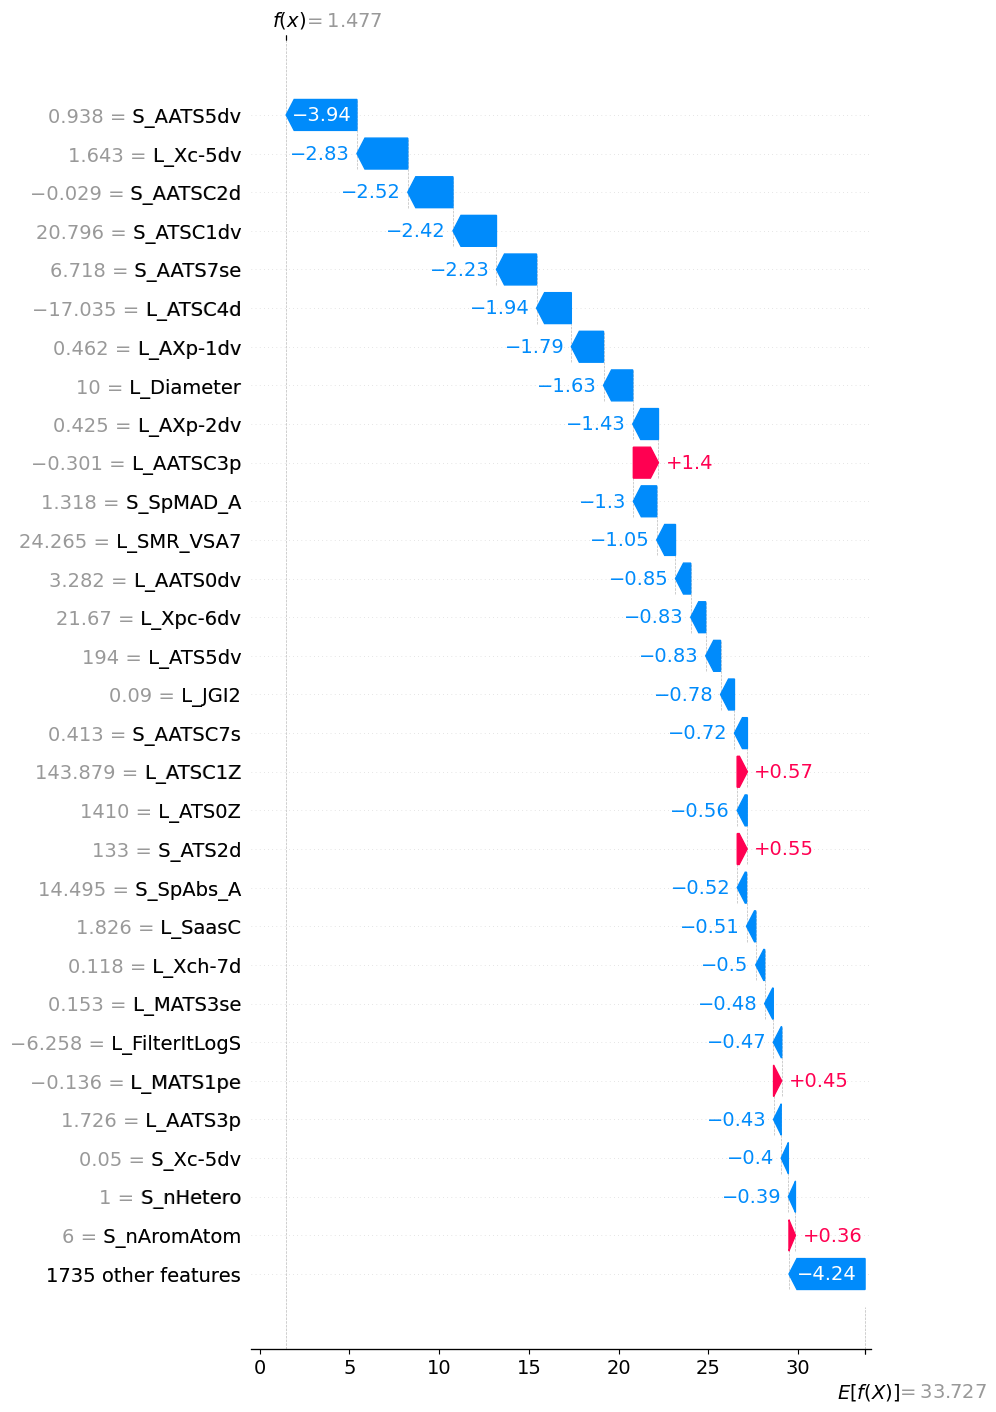

L11


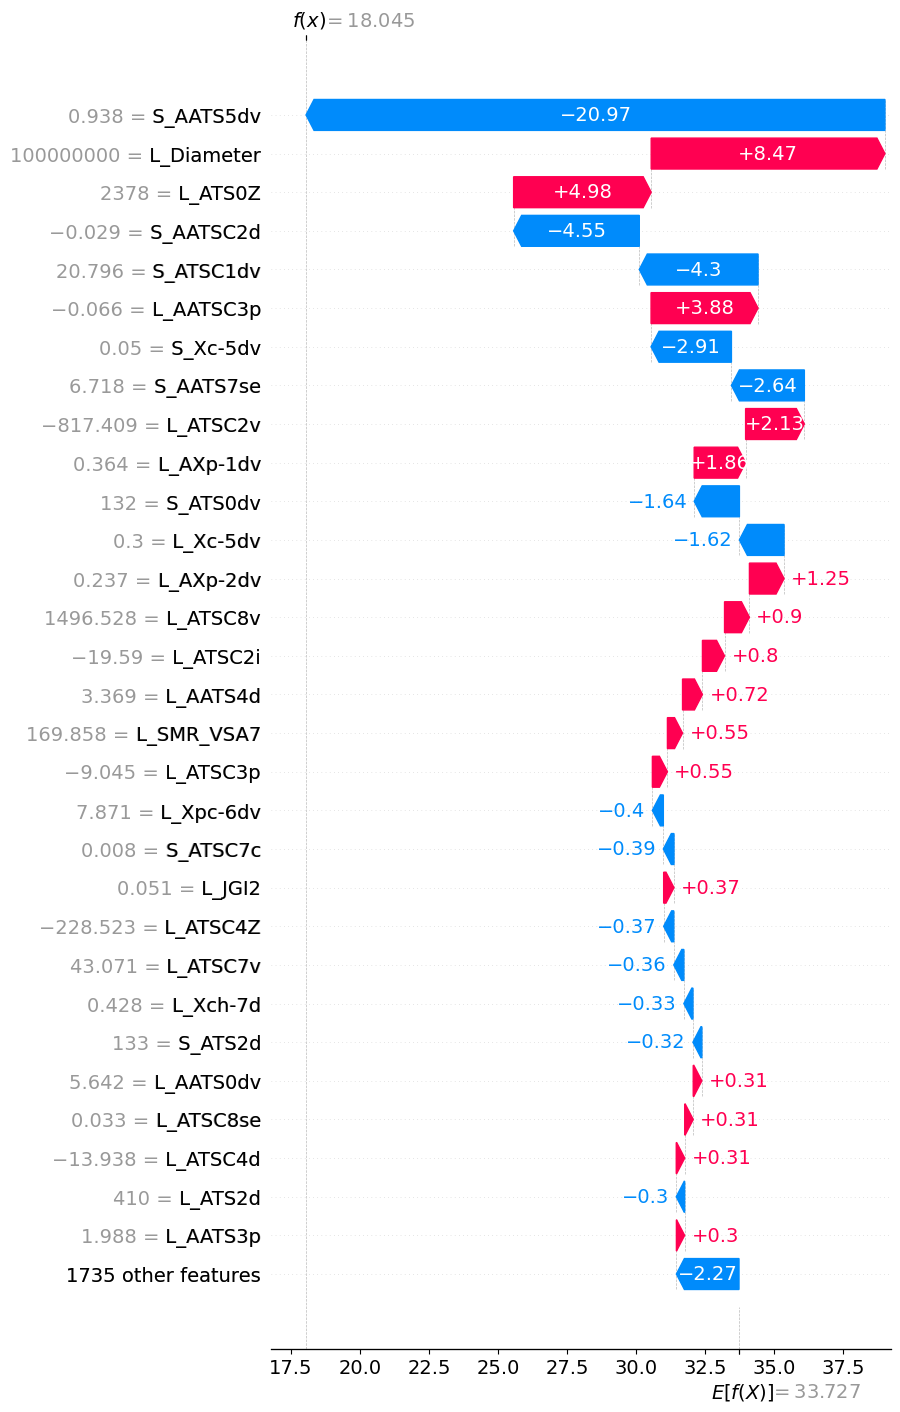

L12


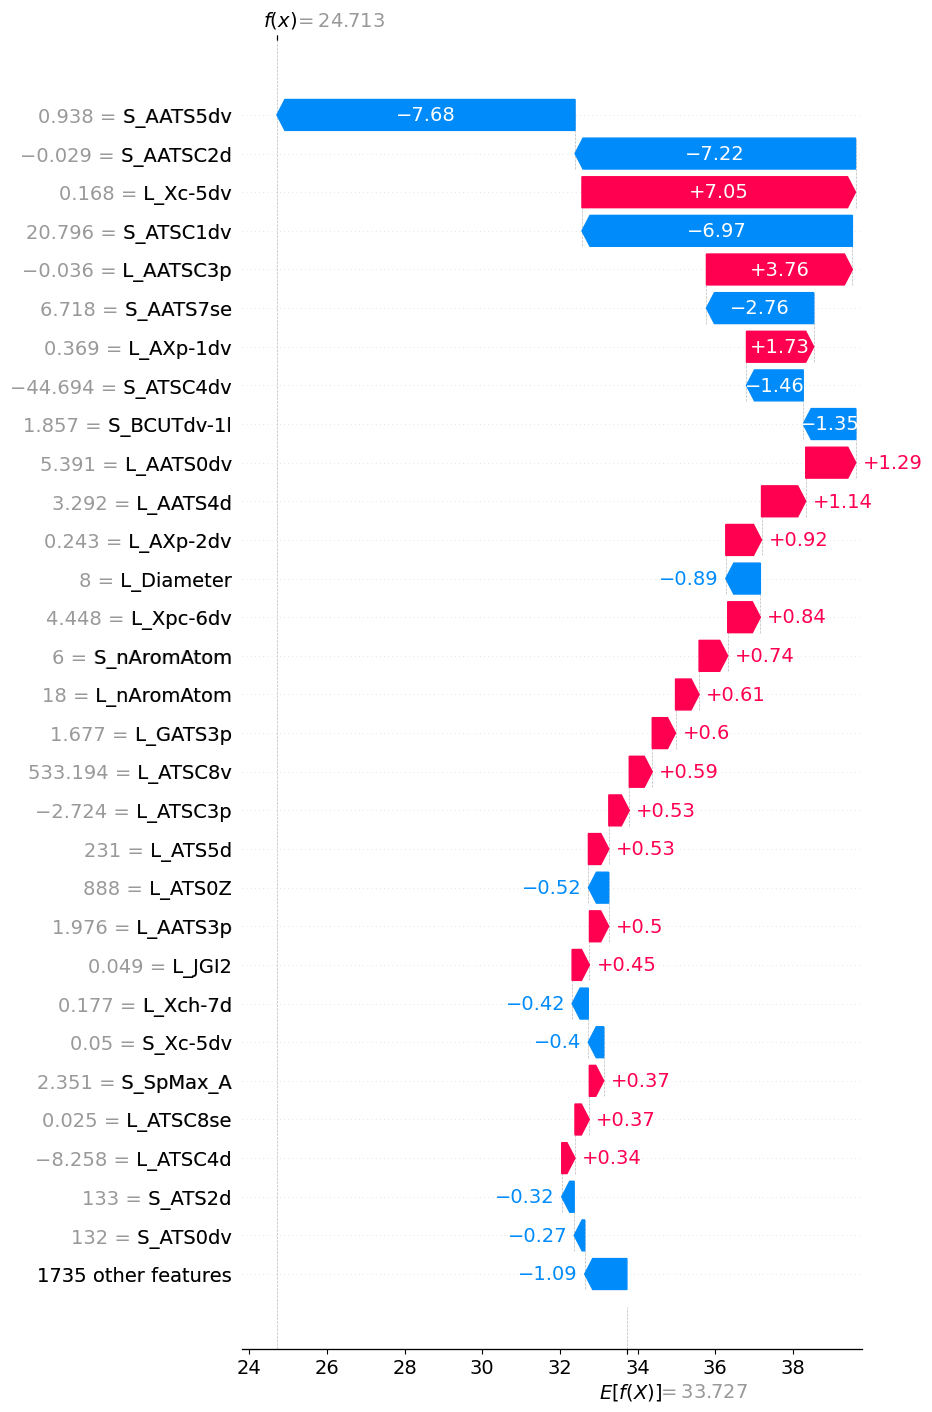

L13


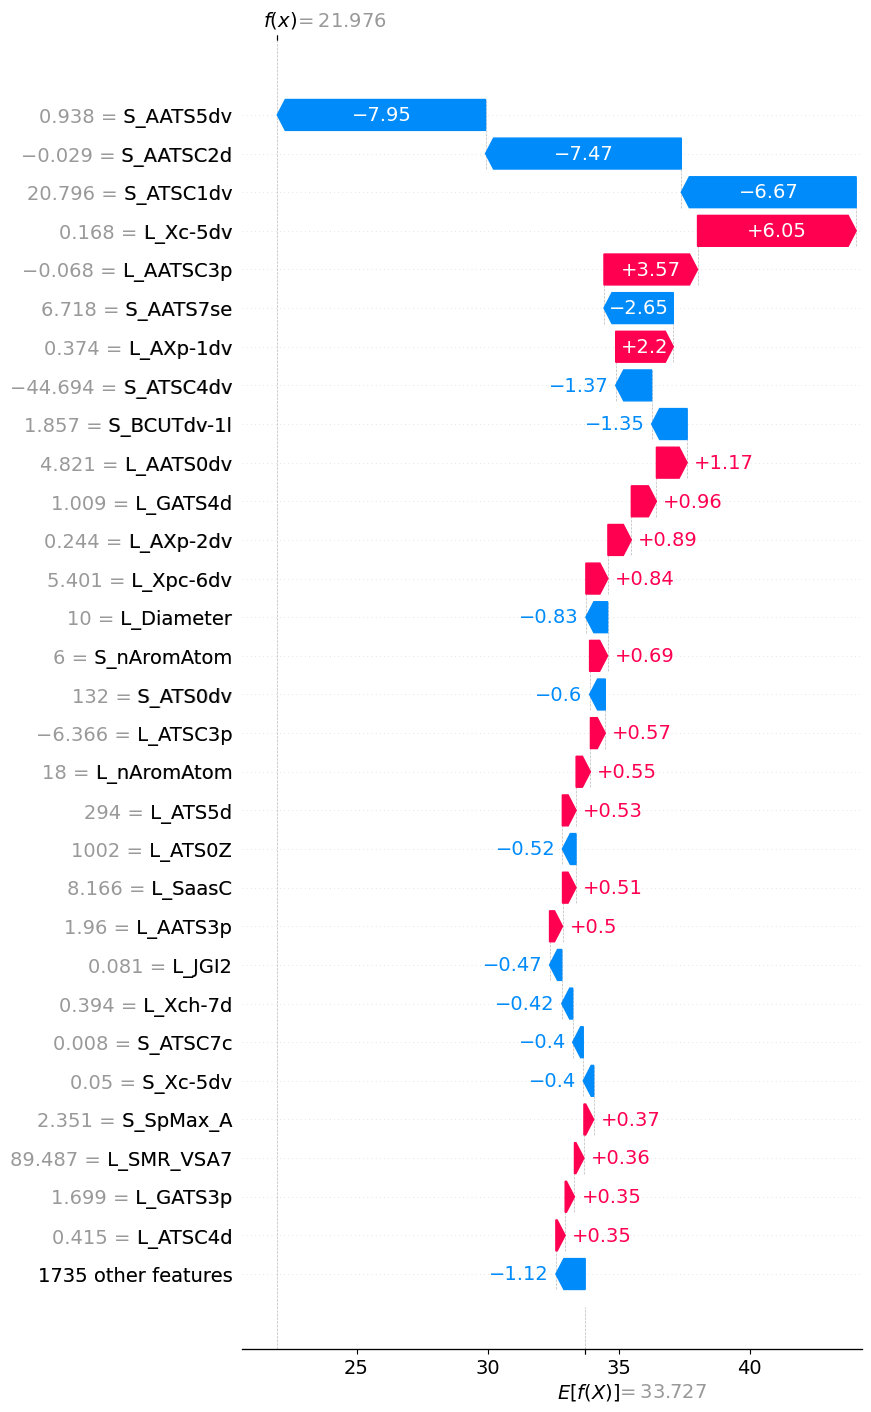

L14


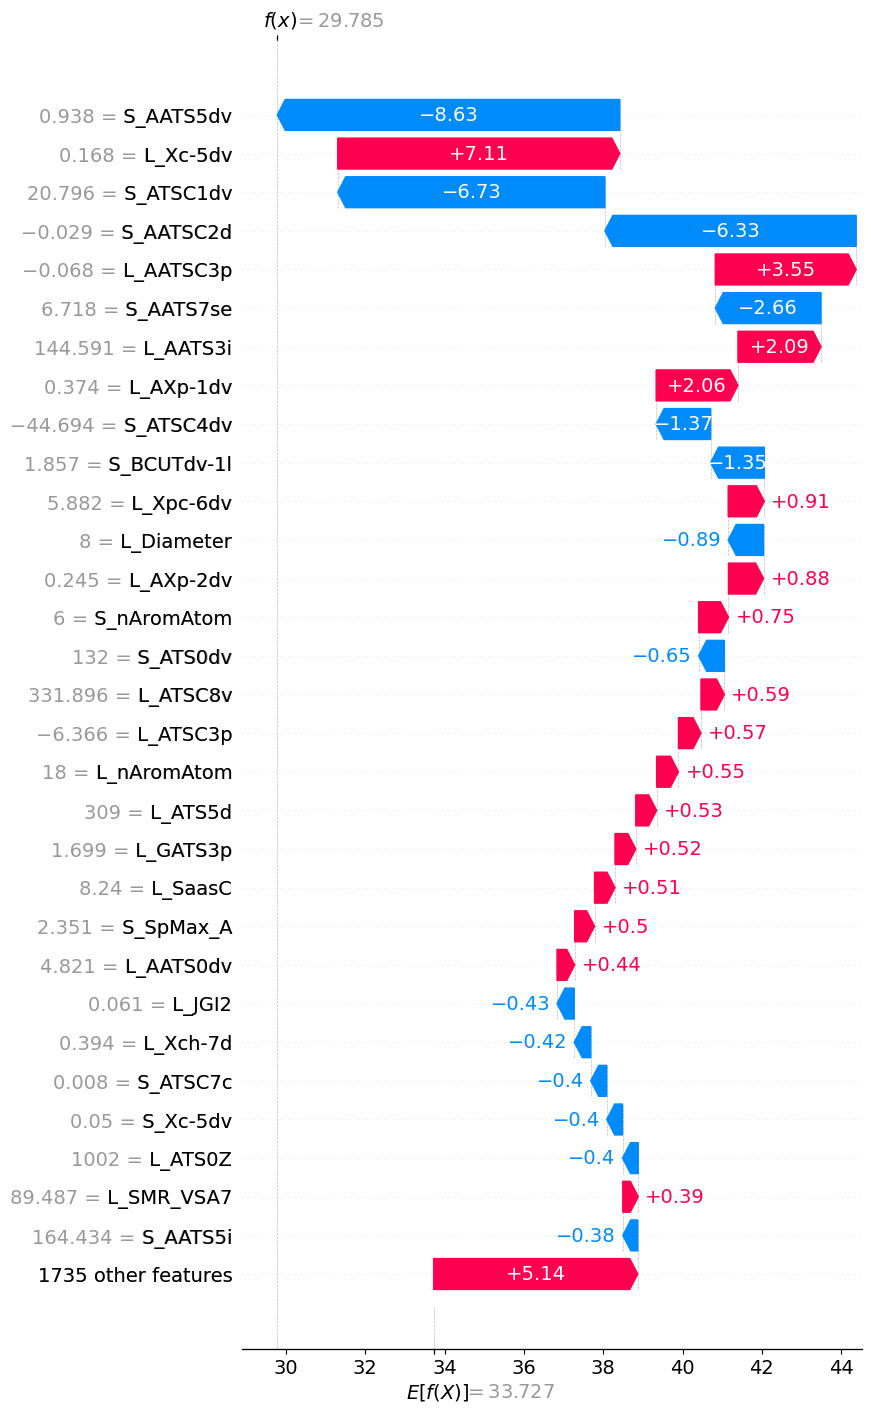

L15


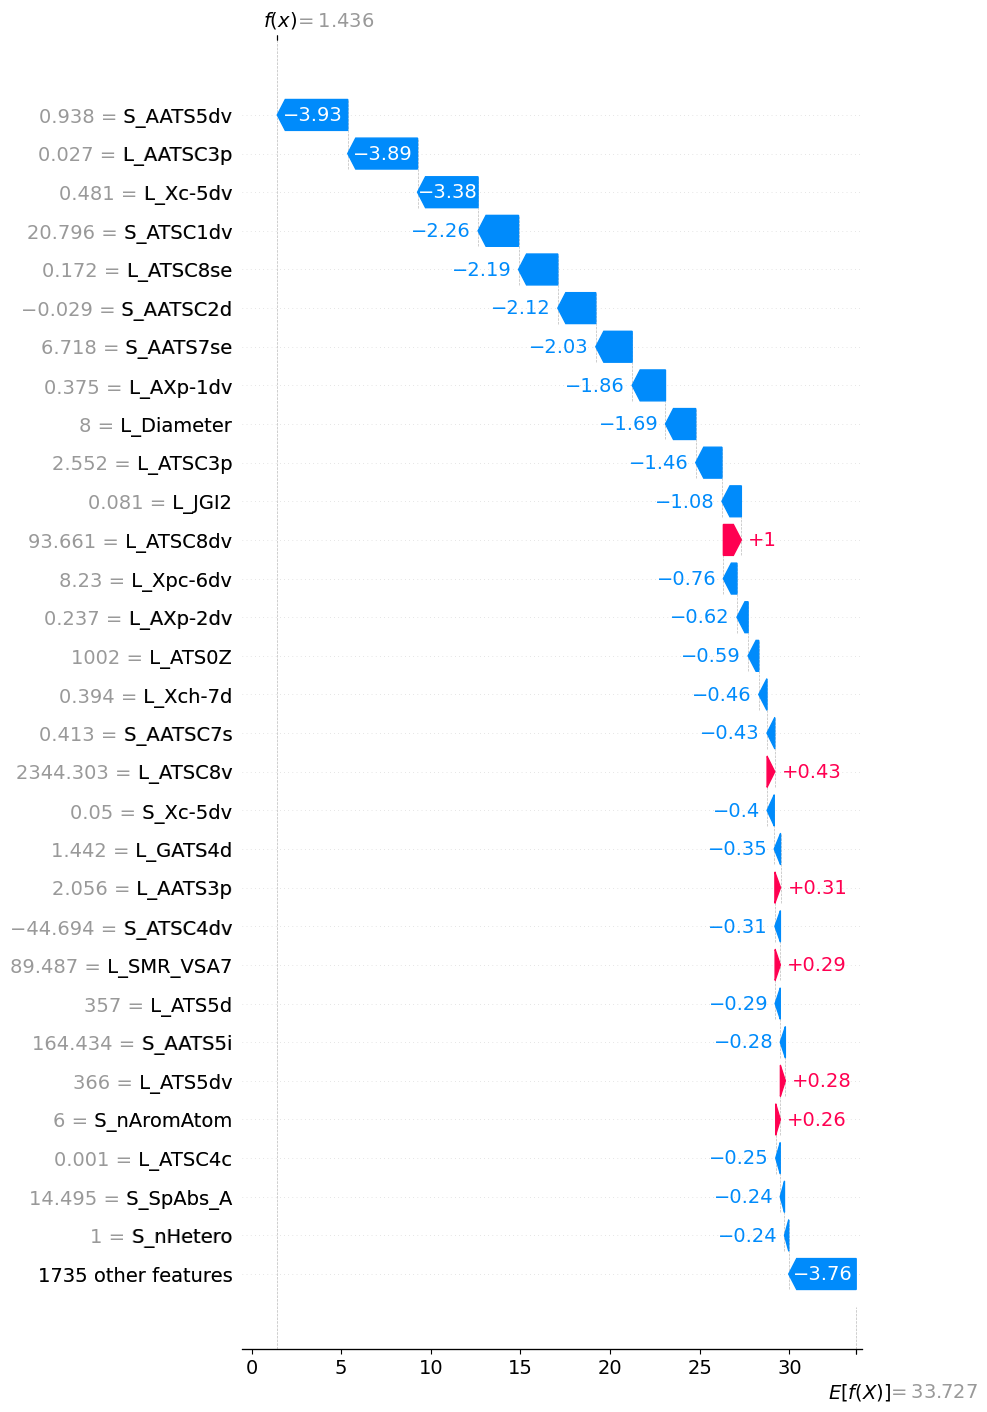

L16


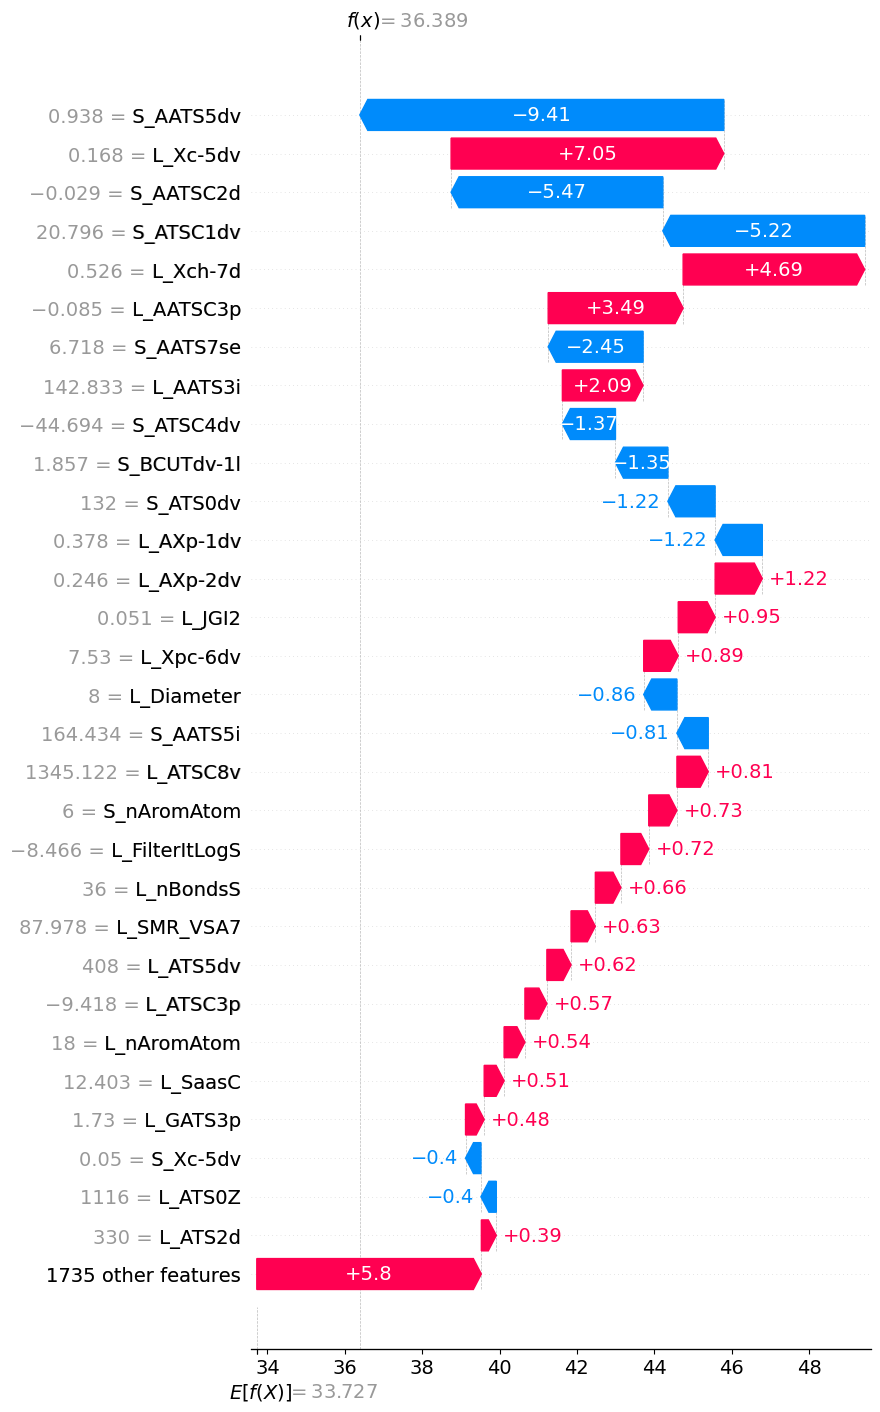

L17


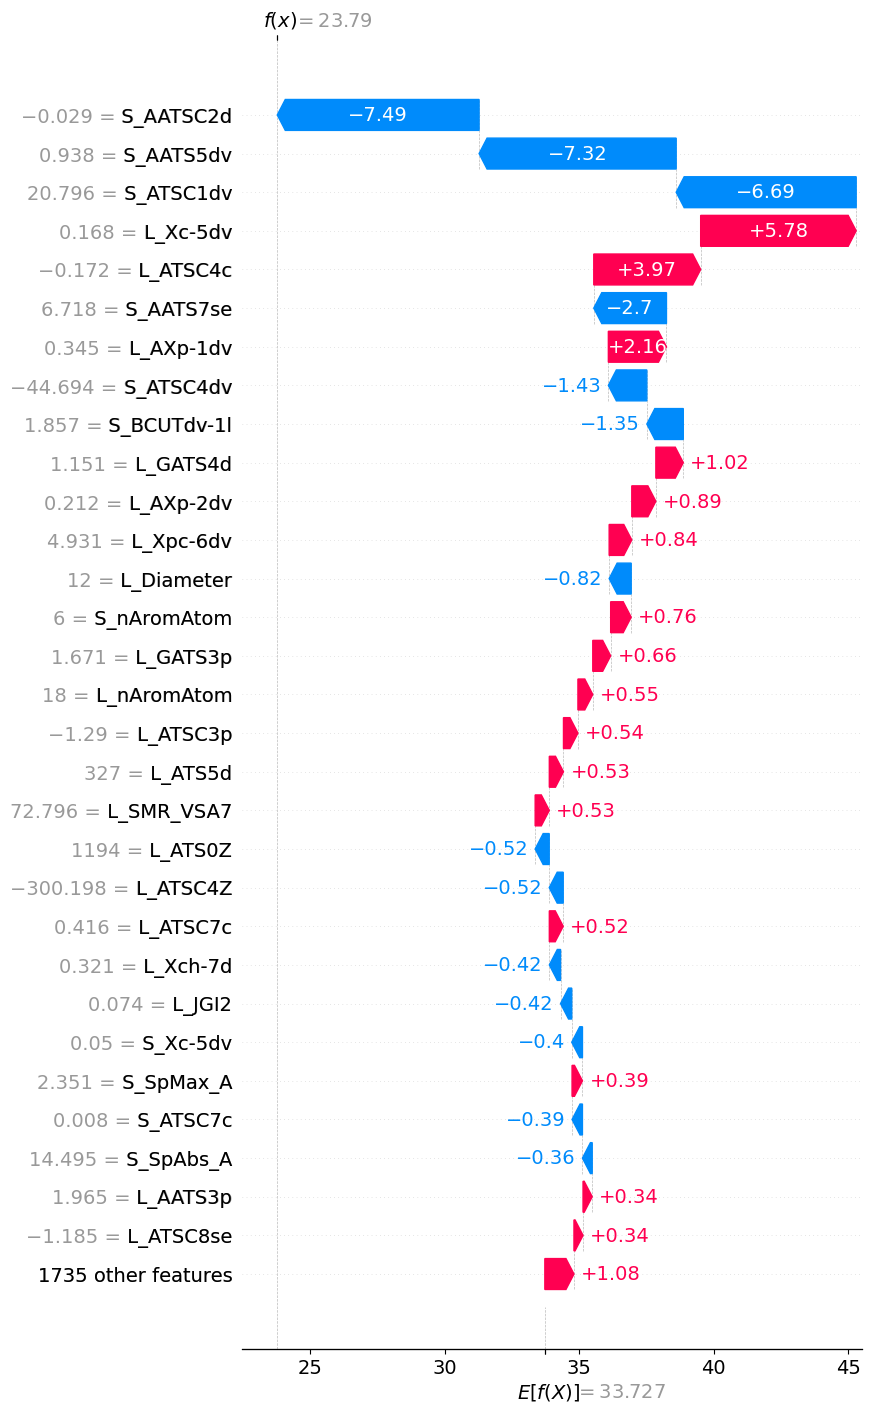

L18


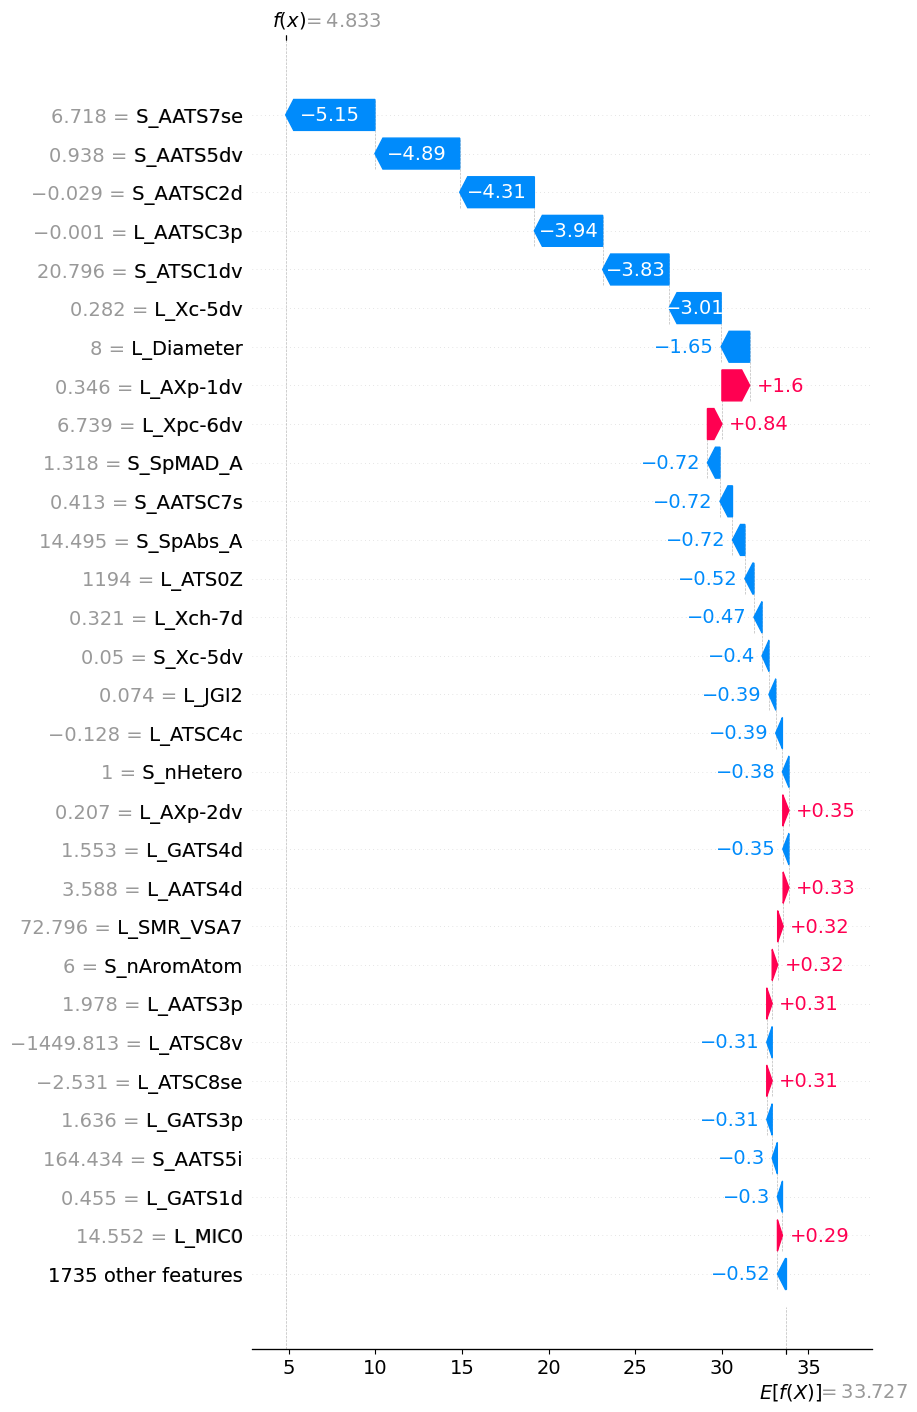

L19


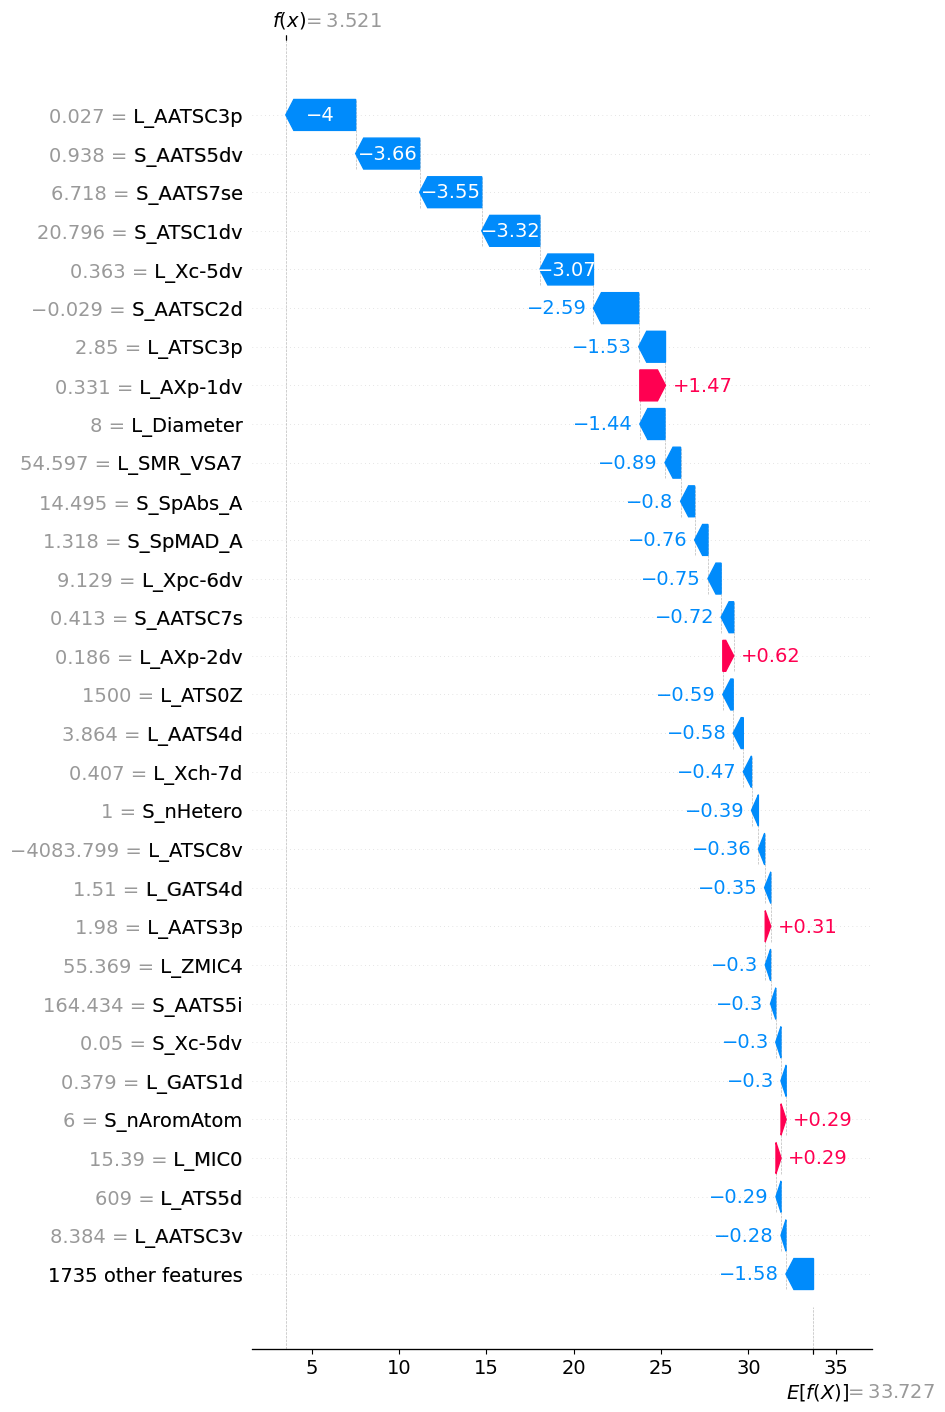

L20


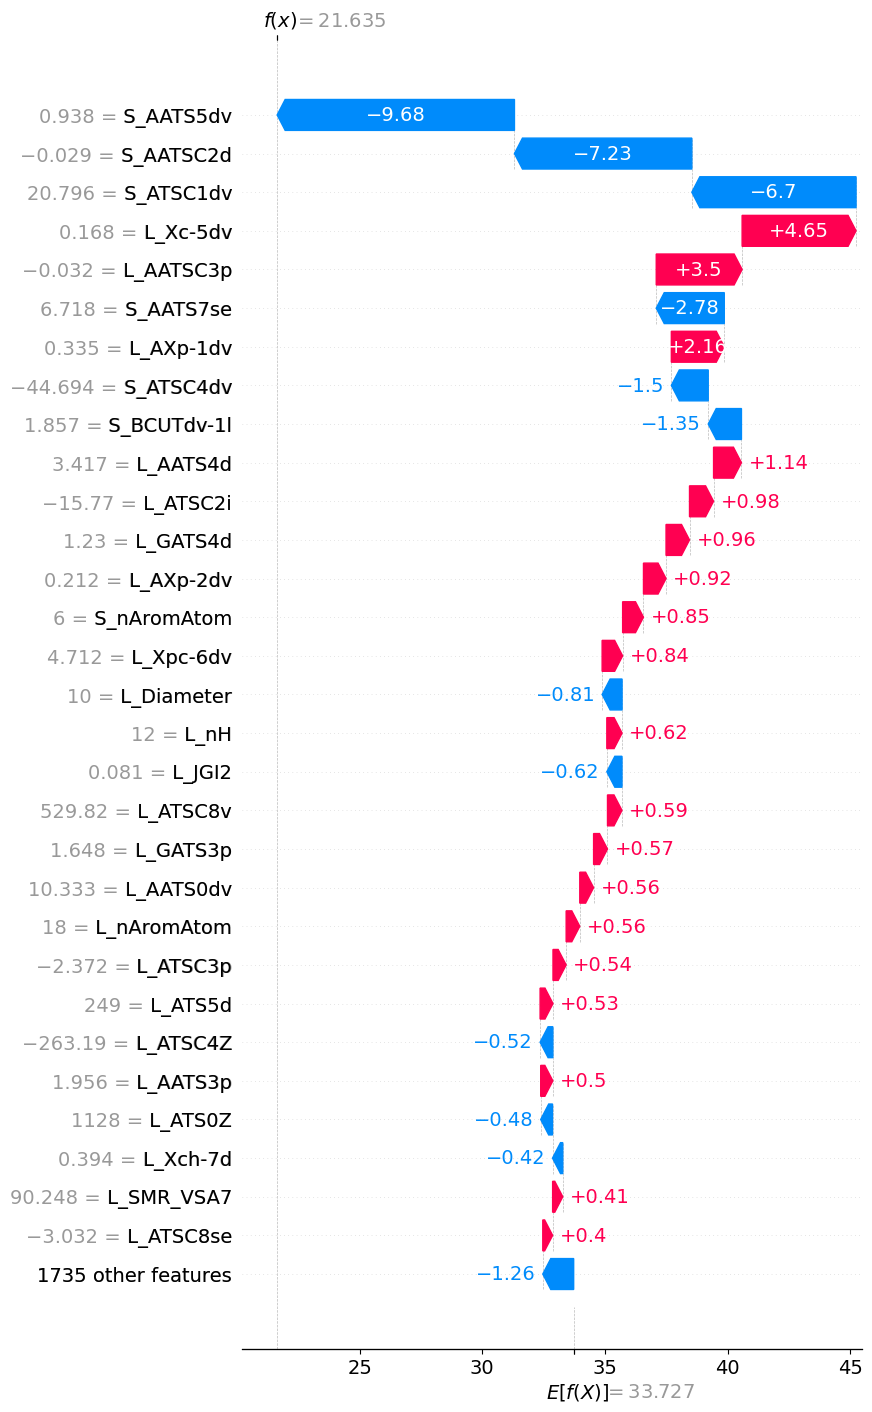

L21


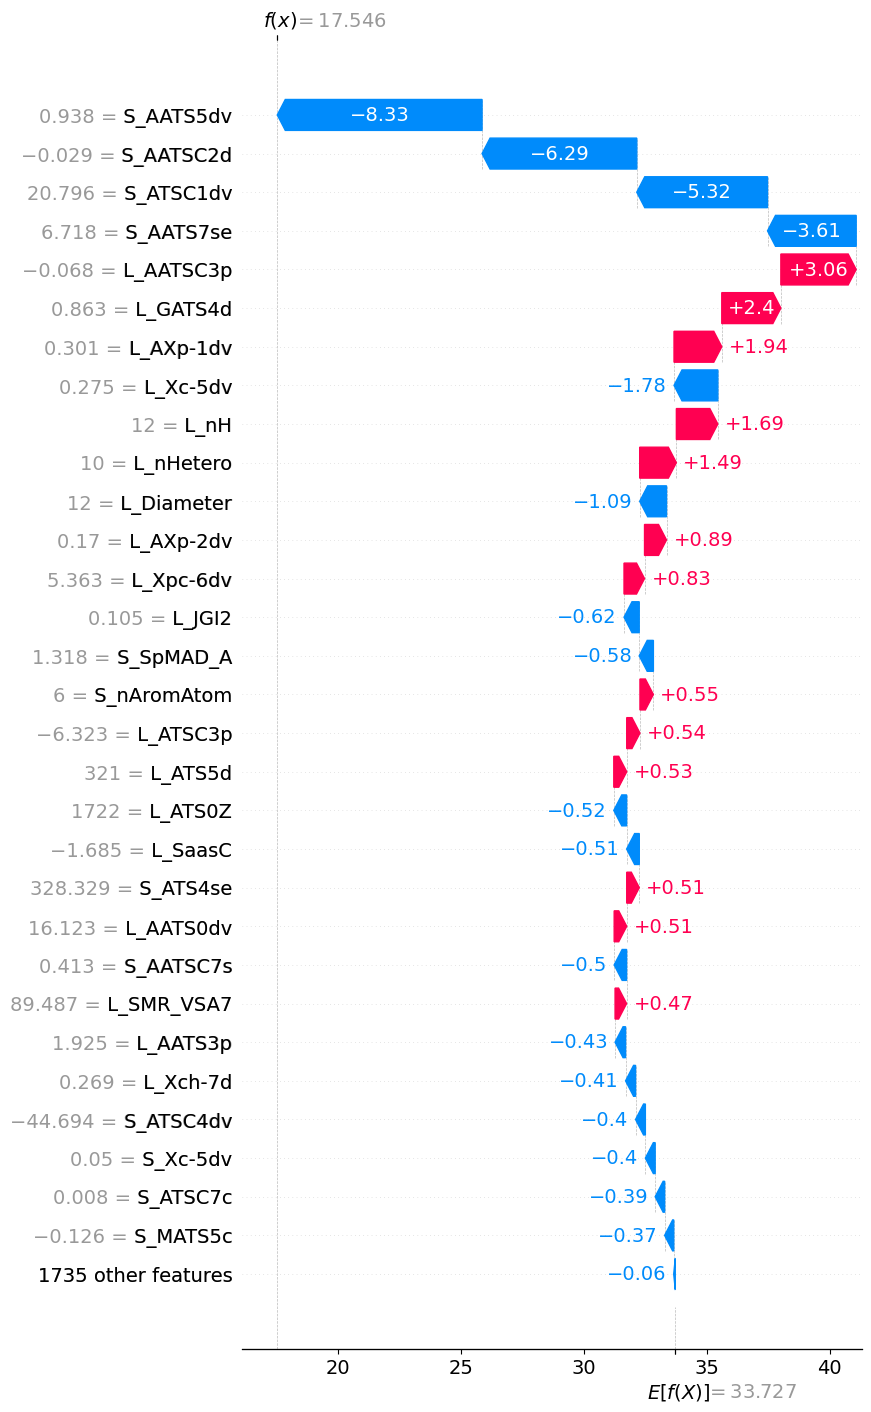

L22


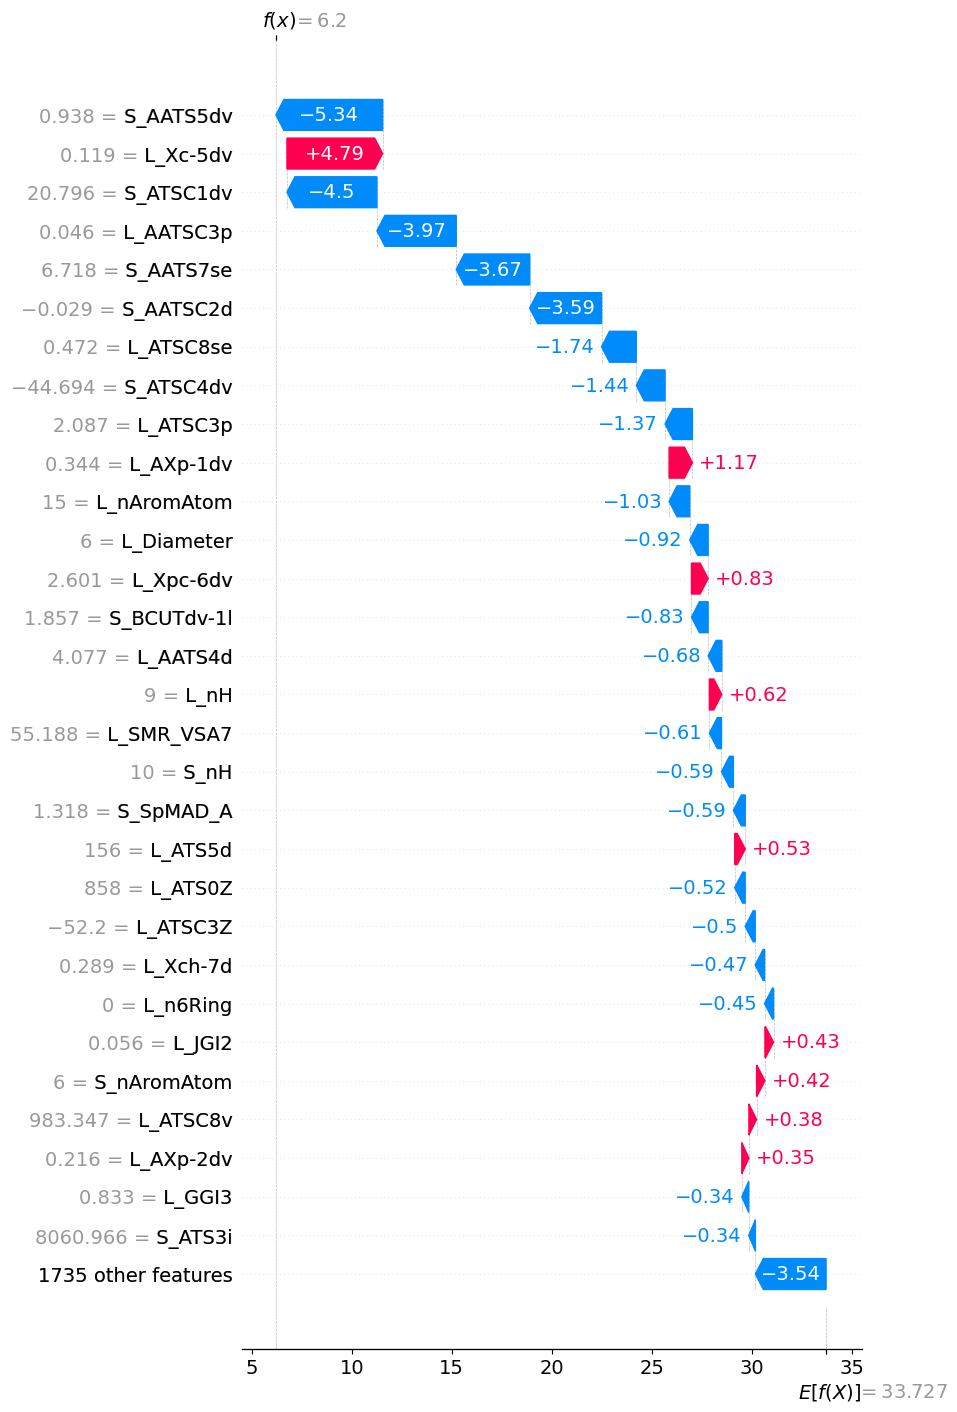

L23


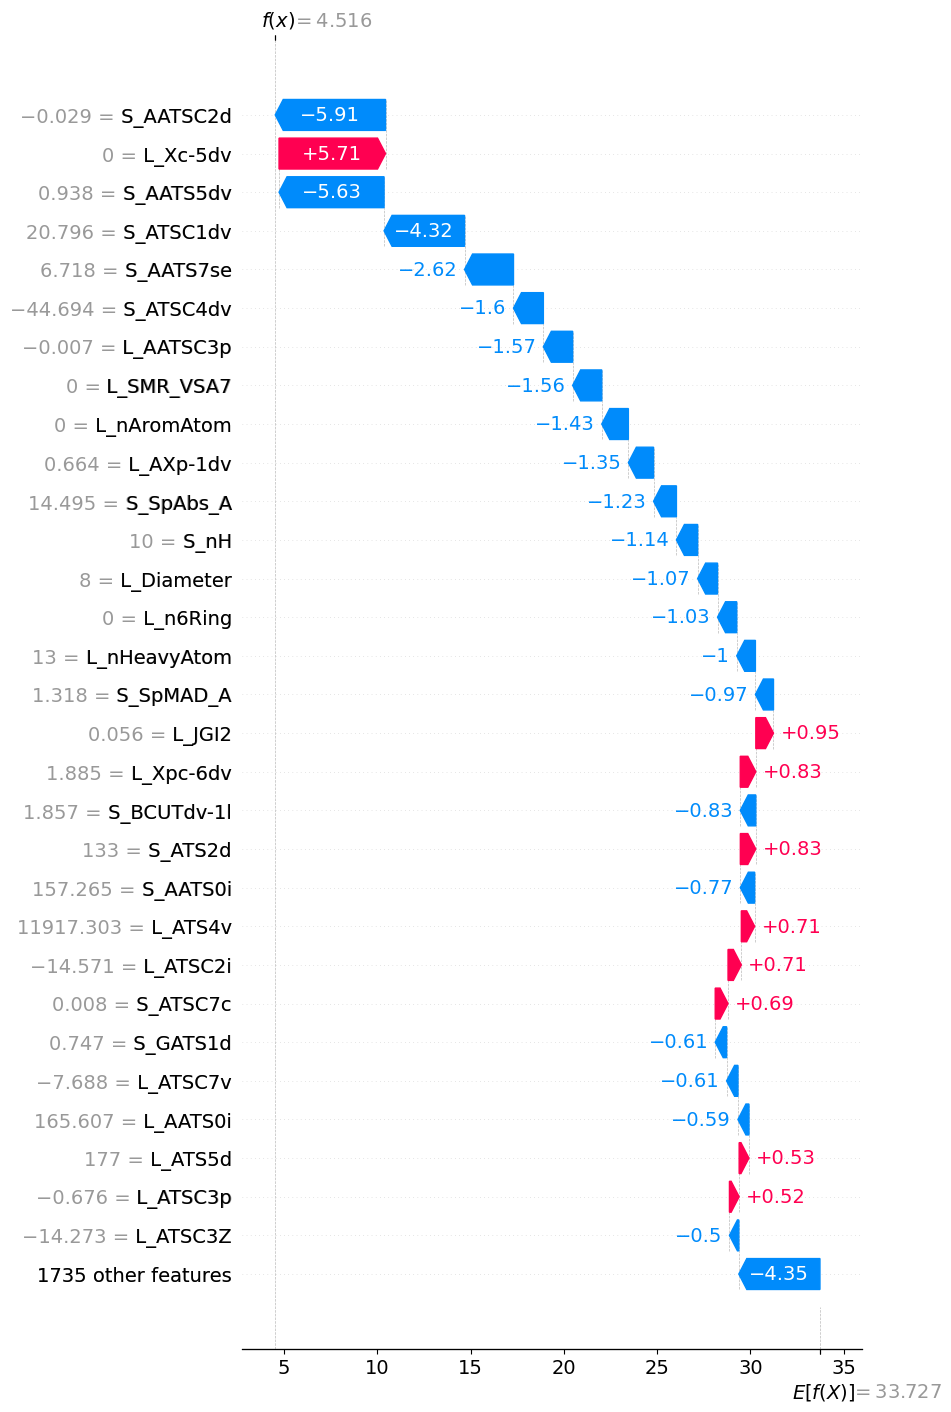

L24


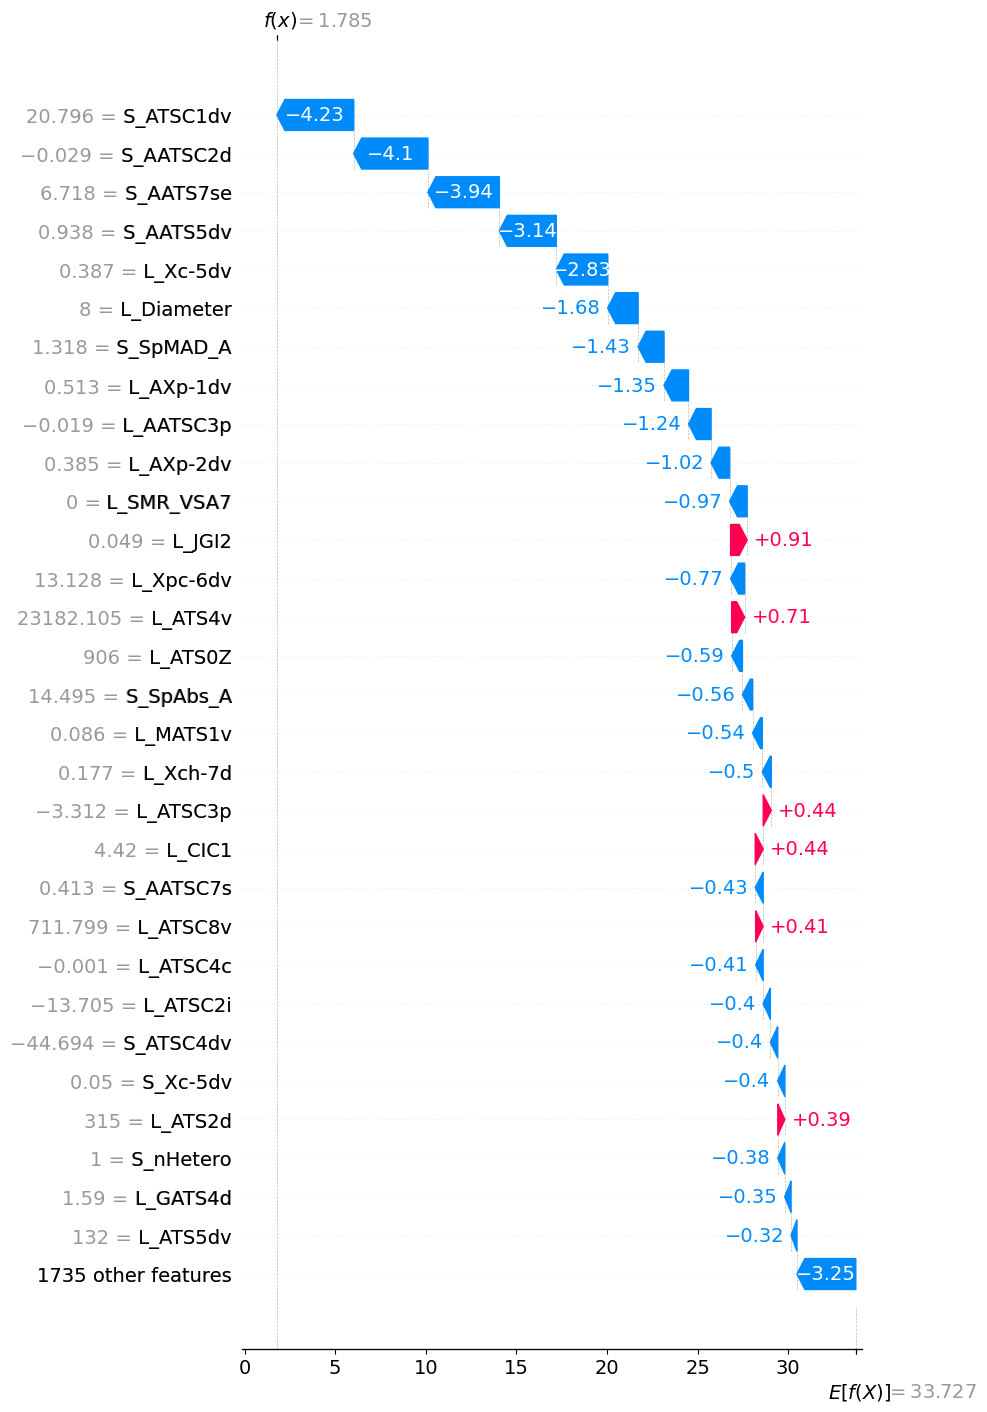

L25


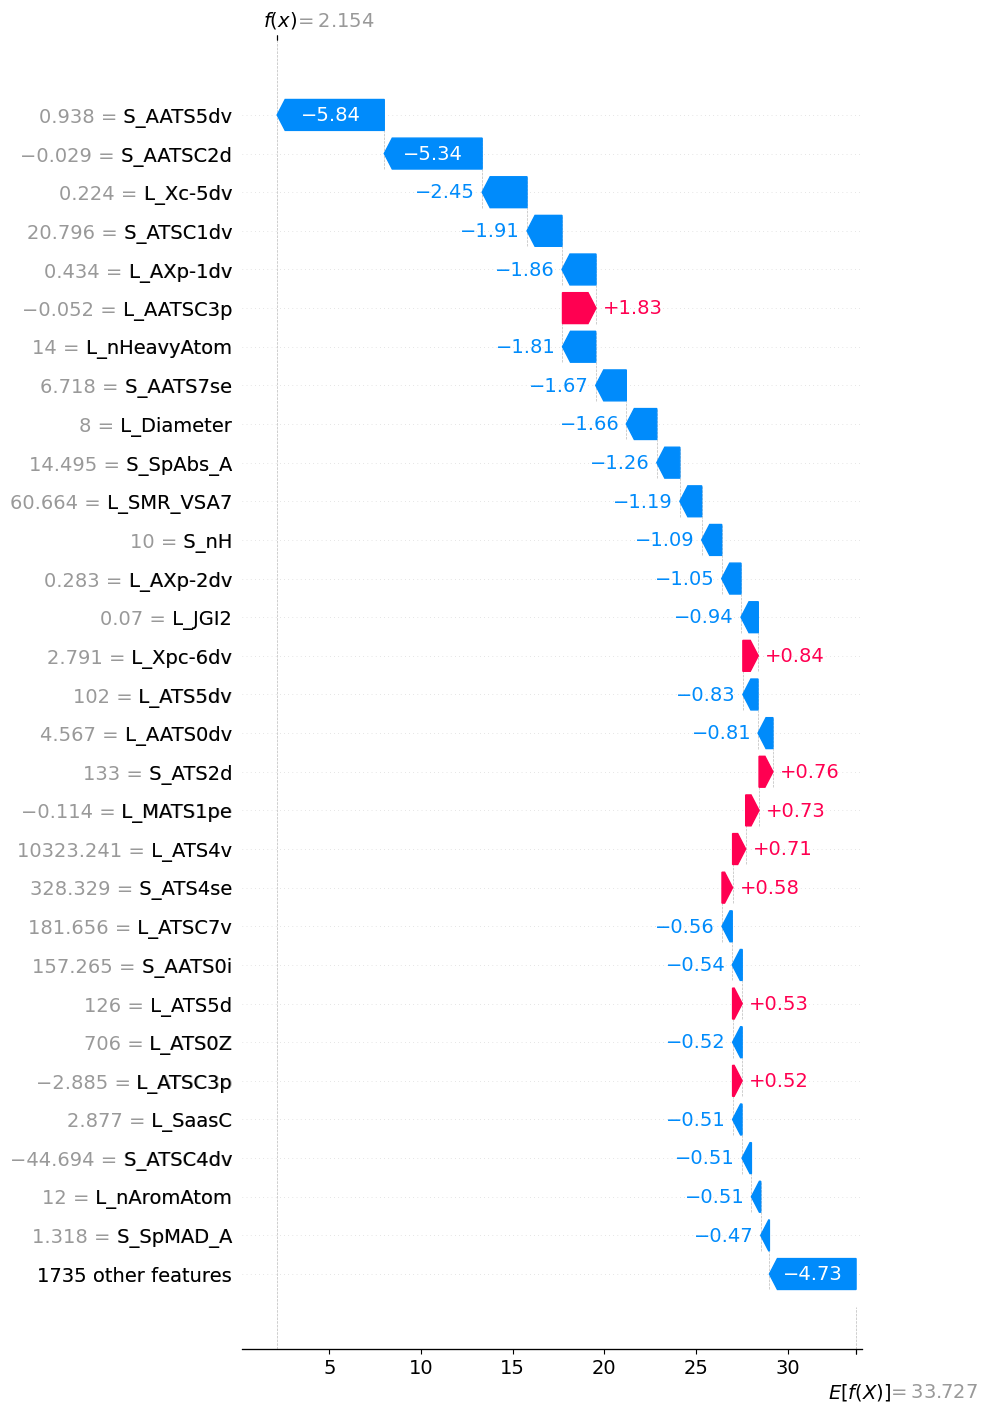

L26


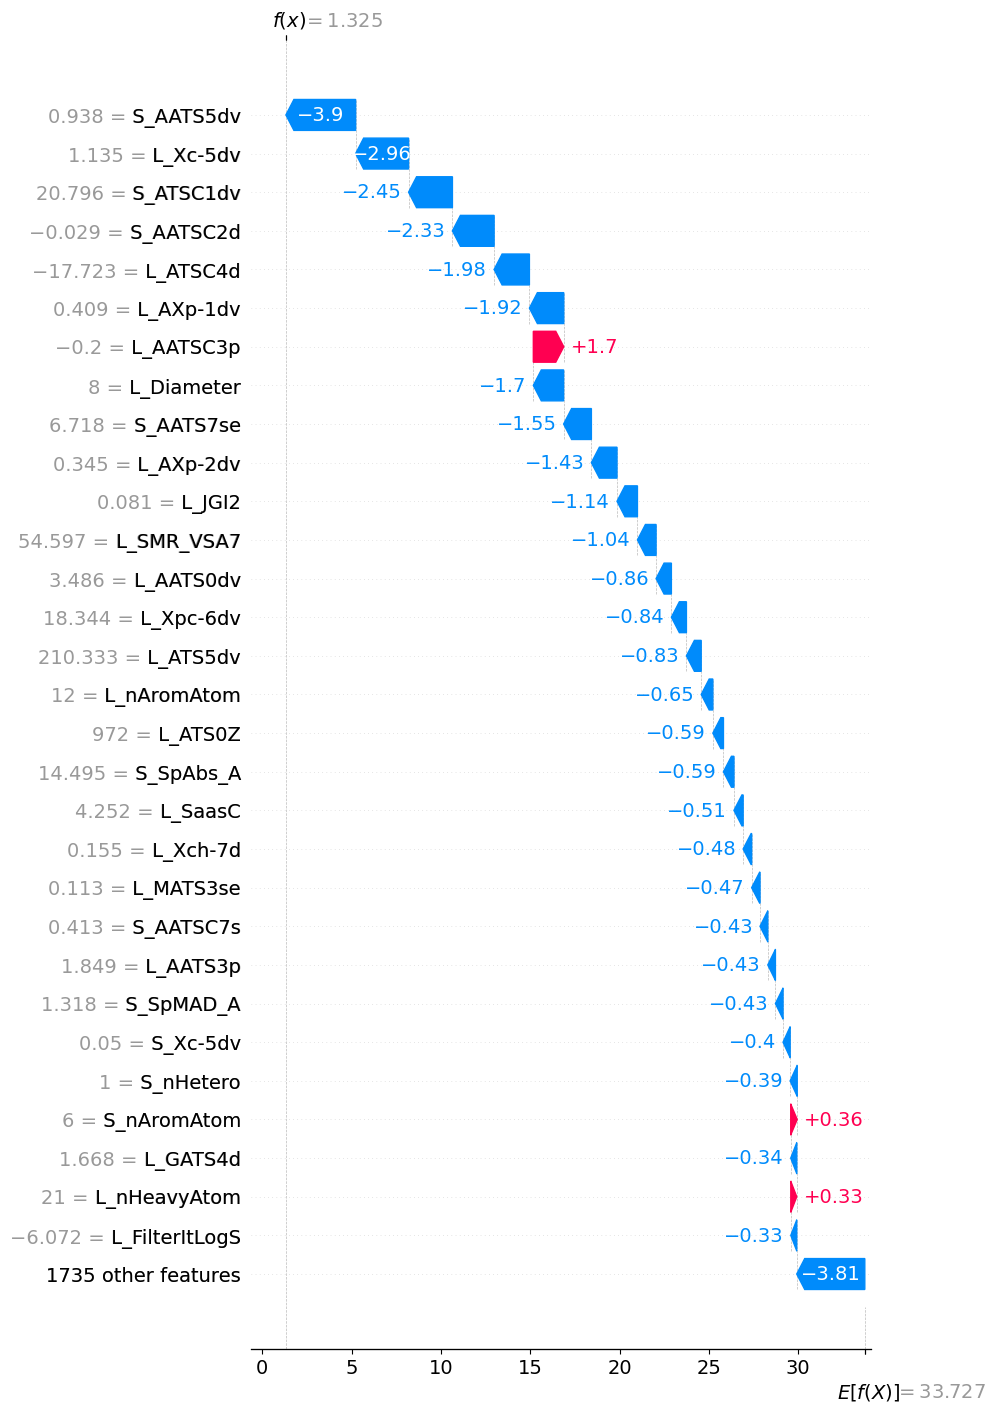

L27


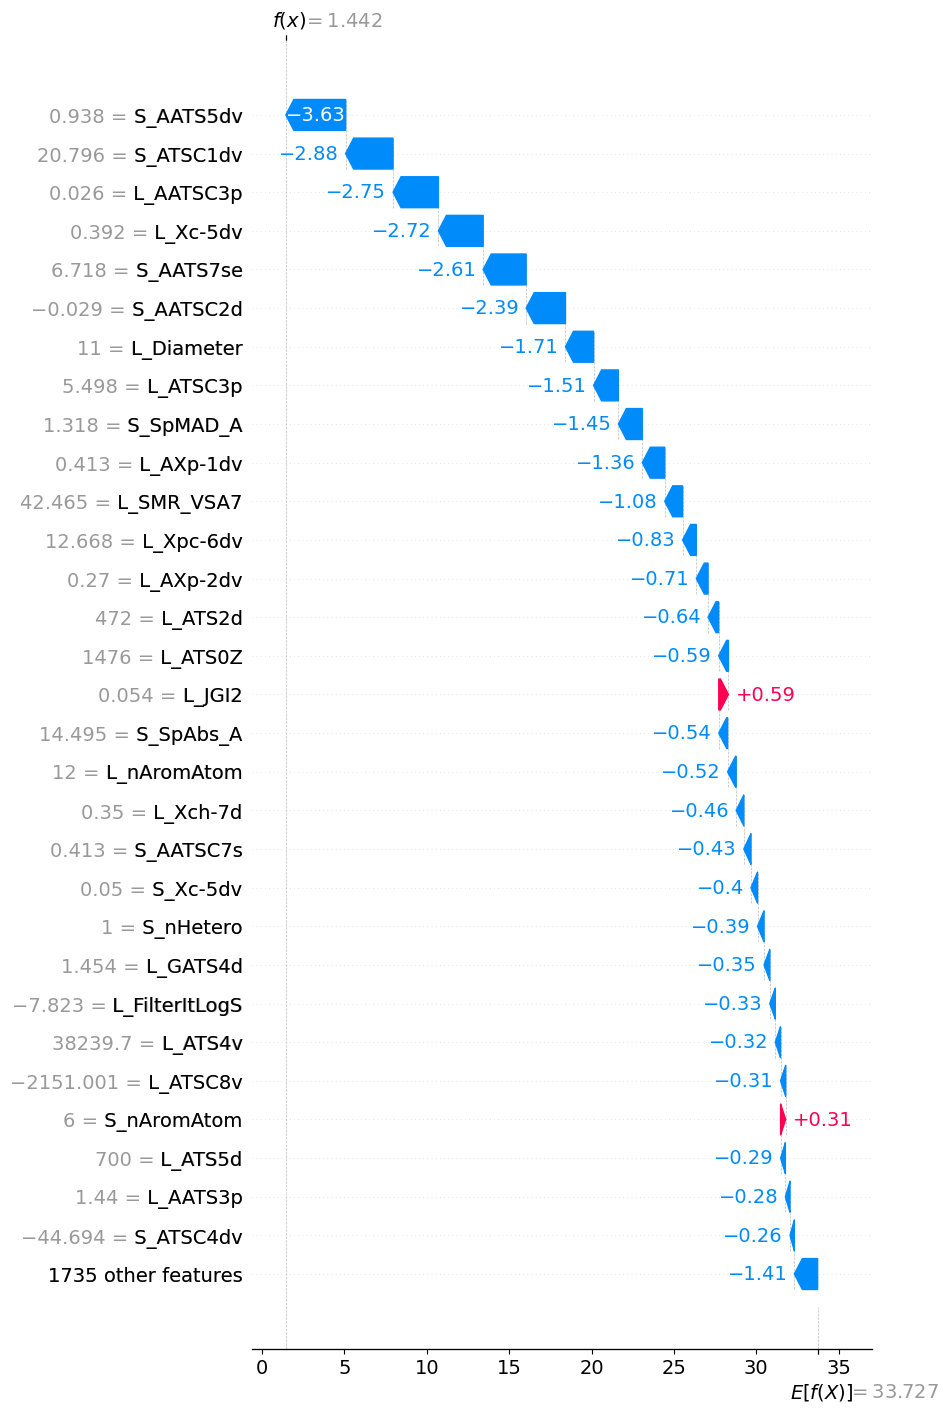

L28


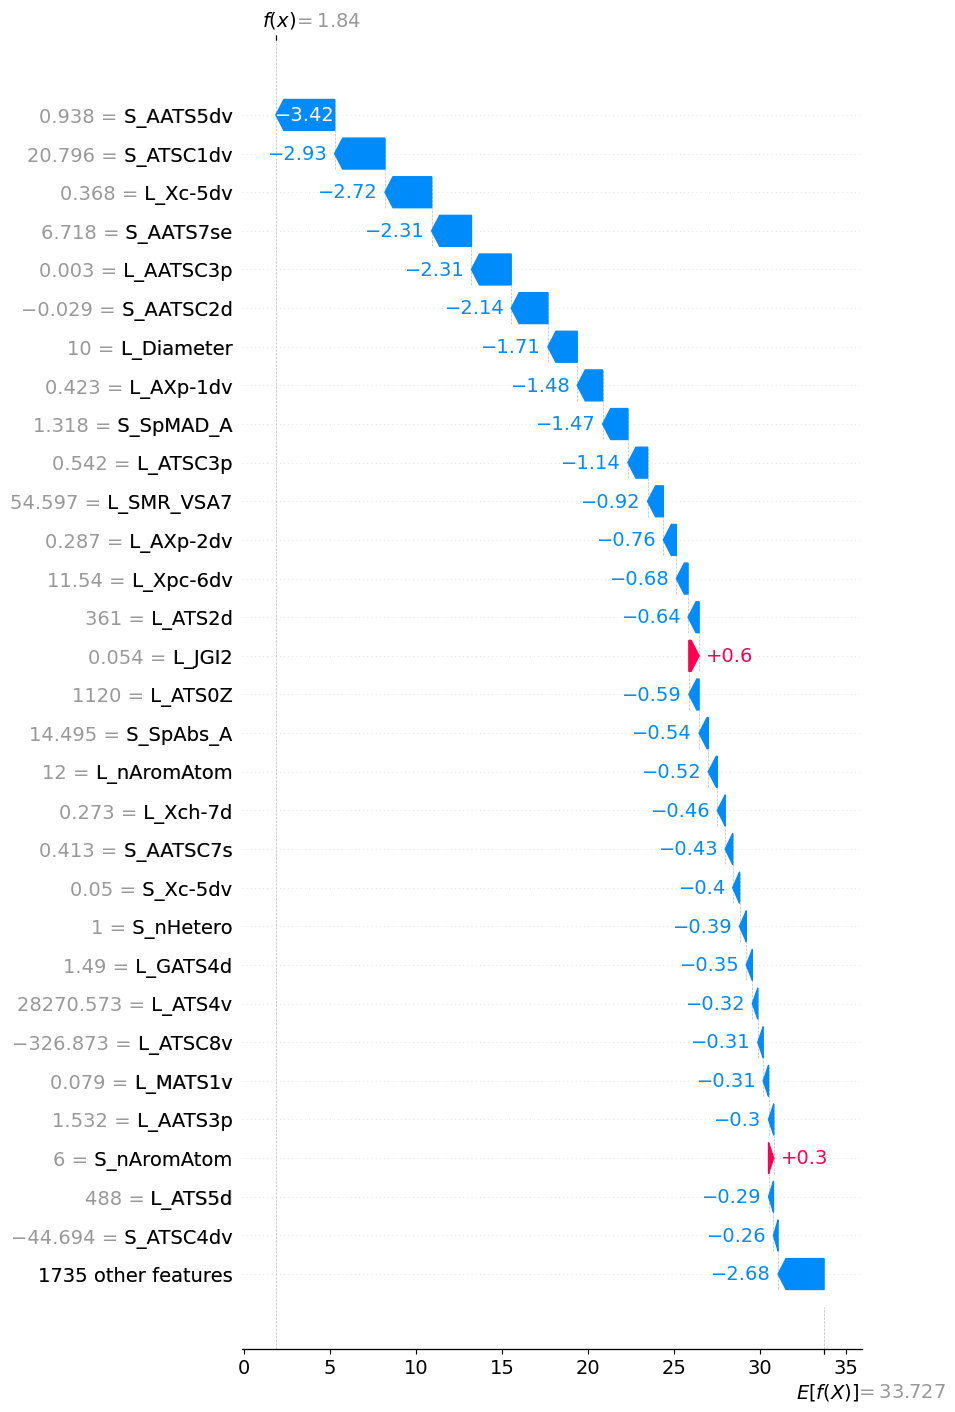

L29


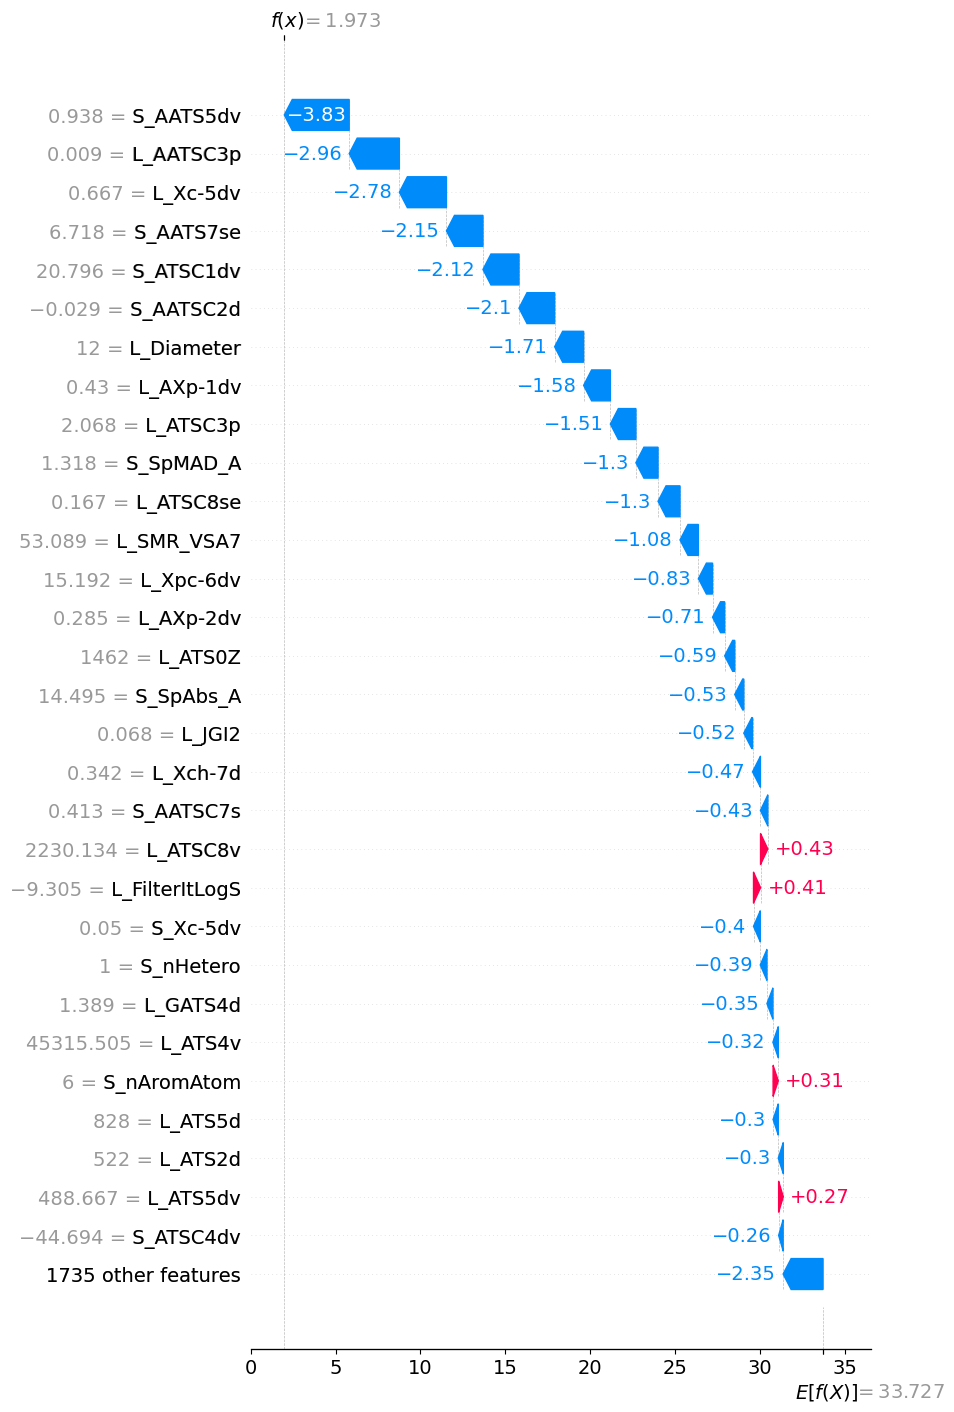

L30


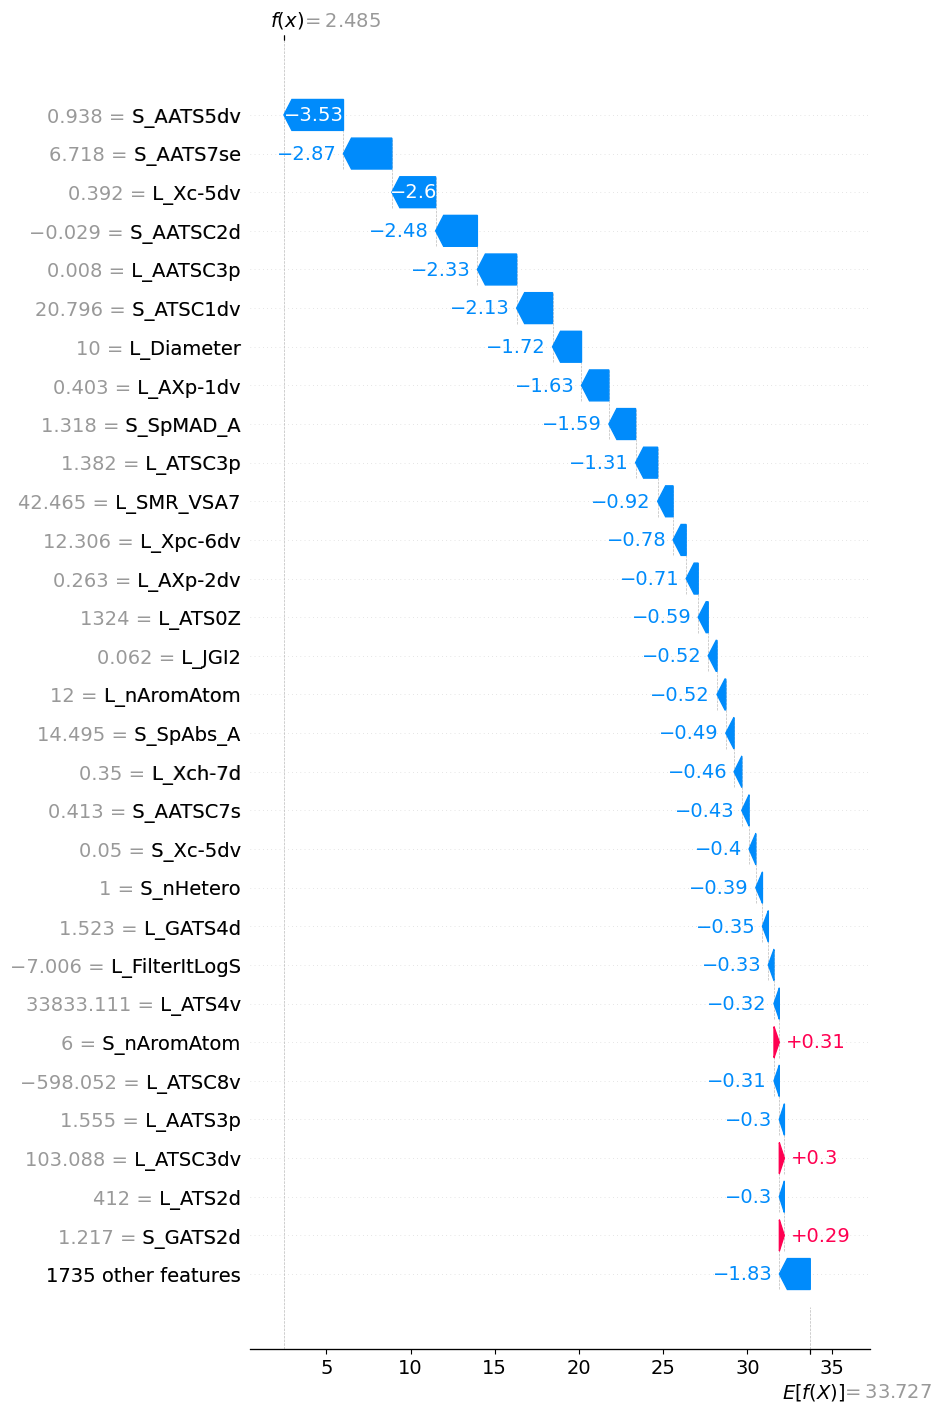

In [23]:
for i in list(range(7, 298, 10)):
    j = int((i-7)/10+1)
    print(f'L{j}')
    fig = plt.figure()
    shap.plots.waterfall(shap_values1[i], show=False, max_display=31)
    for text_obj in fig.findobj(match=plt.Text):
        text_obj.set_fontsize(14)
    plt.show()
    fig.savefig(f'result/SHAP/20/waterfall_L{j}.pdf')

In [24]:
# Output PDF files were deleted in Github.